<a href="https://colab.research.google.com/github/olsem1/WP-3/blob/master/%22wp3_sfo_10_12_2020%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error

In [ ]:
#!rm -rf cpi_reg.xls

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
data = pd.read_excel('cpi_reg.xls', sheet_name = "month")
data = data.set_index('date')

In [ ]:
data = data.interpolate(method='polynomial', order=2, axis=0)
data.isna().sum().sum()

0

In [ ]:
data.min().min()

91.17

In [ ]:
"""
# to log  and diff
data_new = pd.DataFrame(index = data.index[1:])
for region in data.columns:
  data_new[region] = np.diff(np.log(data[region].values))
#  data_new[region] = np.diff((data[region].values))
data=(data_new[:-10])
"""
data=(data[:-10])

In [ ]:
data

,RF,BEL,BRY,VLA,VOR,IVA,KAL,KOS,KUR,LIP,MOS,ORL,RYA,SMO,TAM,TVE,TUL,YAR,MOW,KAR,KOM,ARK,VLG,KAG,LEN,MUR,NGR,PSK,SPB,ADY,KLM,KRA,AST,VGG,ROS,DAG,ING,KAB,KAO,NOR,STA,BAS,MAR,MOR,TAT,UDM,CHV,PER,KIR,NIZ,ORE,PNZ,SAM,SAR,ULY,KUG,SVE,TYU,CHE,ALI,TUV,KHK,ALT,KYA,IRK,KEM,NVS,OMS,TOM,BUR,SAH,ZAB,KAM,PRI,KHA,AMU,MAG,SAK,JEW,CHU
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-01,103.09,106.98,103.70,102.54,102.13,102.69,103.91,102.11,106.32,102.09,103.21,103.27,101.71,103.29,102.33,103.09,102.41,104.43,105.79,103.93,102.83,103.24,102.88,105.21,103.06,104.89,104.81,103.18,103.77,102.93,102.69,103.68,102.20,103.35,105.35,103.36,102.18,101.93,103.81,102.56,102.87,102.16,103.21,102.77,103.05,103.40,103.39,102.48,102.43,102.54,102.66,102.32,103.19,101.54,103.25,102.48,104.44,103.57,102.11,101.81,101.09,101.50,102.65,103.15,102.83,103.04,104.19,101.72,101.92,101.61,101.79,101.82,105.01,102.81,105.15,102.59,102.48,101.53,102.22,110.91
2002-02-01,101.16,100.43,101.07,100.83,100.66,100.91,102.01,103.37,100.88,101.11,101.67,100.88,100.75,100.84,101.44,101.15,101.39,101.00,100.89,100.92,101.36,102.55,101.44,100.15,101.51,102.37,101.08,100.83,101.36,101.24,101.46,100.20,102.36,100.76,100.76,101.63,101.64,100.53,101.49,100.31,101.07,100.87,101.63,101.82,100.75,102.45,100.44,101.79,100.77,101.03,101.04,100.36,101.47,100.38,101.32,102.07,100.69,101.45,101.32,103.08,100.62,102.35,100.34,101.39,100.98,101.43,100.95,100.90,101.88,100.92,100.56,101.88,101.86,100.81,101.84,100.63,102.21,101.69,103.21,102.68
2002-03-01,101.08,100.98,101.67,100.52,103.30,101.26,100.83,100.66,100.27,100.94,101.09,100.73,100.83,100.97,100.78,100.93,100.60,100.79,100.70,100.48,100.79,100.99,101.46,101.14,101.25,100.34,101.36,100.83,101.67,99.90,100.52,100.47,100.58,104.69,100.29,100.18,100.36,100.68,101.21,101.04,100.94,101.29,101.32,100.96,100.41,101.20,100.63,100.93,100.82,101.47,100.69,100.24,101.06,100.04,101.09,100.43,100.62,100.95,100.87,100.73,100.49,100.73,101.30,103.07,100.53,100.78,100.30,100.31,101.24,100.51,102.14,103.03,101.16,100.57,100.40,101.60,100.37,100.97,100.71,100.78
2002-04-01,101.16,100.63,100.72,100.89,100.84,102.68,100.67,100.68,101.96,100.41,101.60,100.77,100.61,101.63,100.31,100.79,100.94,100.11,100.78,101.02,101.74,101.13,100.70,101.44,101.13,100.77,100.97,101.37,101.09,102.52,101.06,101.62,100.87,101.50,101.34,102.18,102.15,101.47,101.74,101.01,102.08,100.83,100.80,100.55,101.59,101.34,101.68,101.64,101.23,100.55,101.06,100.51,103.57,101.49,100.72,100.89,101.37,101.75,100.95,101.41,100.24,100.89,101.26,100.86,100.63,100.73,101.98,101.13,102.25,100.26,101.28,100.82,101.03,100.10,101.08,100.78,101.51,101.30,100.59,102.30
2002-05-01,101.69,101.68,101.47,101.77,99.33,100.73,101.44,101.64,101.48,100.90,101.94,101.01,101.70,101.35,100.58,101.13,101.57,102.42,102.18,101.89,101.76,101.51,101.73,102.27,101.76,101.44,101.16,101.17,101.38,101.80,102.44,103.02,102.88,101.86,103.02,102.43,102.91,103.43,102.02,101.54,101.70,101.73,101.87,102.52,105.04,101.84,104.49,102.12,101.62,102.00,102.81,101.80,102.32,101.56,102.68,101.48,101.88,100.98,101.38,100.45,101.49,102.18,101.99,101.39,101.19,101.13,100.81,101.71,101.74,101.31,101.06,100.62,100.84,101.04,101.33,100.70,101.58,101.62,102.44,100.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,100.20,100.34,100.24,100.25,100.24,100.25,100.02,100.38,100.20,100.11,100.19,100.24,100.66,99.98,100.41,100.06,100.42,100.09,100.15,100.22,100.50,100.24,100.20,99.94,100.16,99.98,100.26,100.34,100.26,99.85,99.03,100.19,99.92,99.90,99.89,99.68,99.54,99.92,100.14,99.57,100.43,100.28,100.27,100.26,100.37,100.31,100.17,100.41,100.20,100.30,100.14,100.26,100.16,100.04,100.14,100.40,100.29,100.18,100.35,100.22


Проверка на стационарность


In [ ]:
"""from statsmodels.tsa.stattools import adfuller
%matplotlib inline
st = 0
notst = 0
p_value = 0.01
for num, region in enumerate(data.keys()):
  if region == 'RF':
    continue
  result = adfuller(data[region])
  result_text = []
  result_text.append('ADF: {:.5}, '.format(result[0]))
  result_text.append('p-val: {:.2}, '.format(result[1]))
  if result[1] < float(p_value):
      print('Регион:', region, 'p-val: {:.2}, '.format(result[1]))
      st += 1
  else:
      print('Нестационарный ряд в регионе:', region, 'p-val: {:.2}, '.format(result[1]))
      notst += 1
print('Нестационарных рядов всего:', notst, ' на уровне значимости , ', p_value)
"""

"from statsmodels.tsa.stattools import adfuller\n%matplotlib inline\nst = 0\nnotst = 0\np_value = 0.01\nfor num, region in enumerate(data.keys()):\n  if region == 'RF':\n    continue\n  result = adfuller(data[region])\n  result_text = []\n  result_text.append('ADF: {:.5}, '.format(result[0]))\n  result_text.append('p-val: {:.2}, '.format(result[1]))\n  if result[1] < float(p_value):\n      print('Регион:', region, 'p-val: {:.2}, '.format(result[1]))\n      st += 1\n  else:\n      print('Нестационарный ряд в регионе:', region, 'p-val: {:.2}, '.format(result[1]))\n      notst += 1\nprint('Нестационарных рядов всего:', notst, ' на уровне значимости , ', p_value)\n"

In [ ]:
#reg_names = ['ALI','TUV','KHK','ALT','KYA','IRK','KEM','NVS','OMS','TOM']
reg_names = data.columns
reg_names

Index(['RF', 'BEL', 'BRY', 'VLA', 'VOR', 'IVA', 'KAL', 'KOS', 'KUR', 'LIP',
       'MOS', 'ORL', 'RYA', 'SMO', 'TAM', 'TVE', 'TUL', 'YAR', 'MOW', 'KAR',
       'KOM', 'ARK', 'VLG', 'KAG', 'LEN', 'MUR', 'NGR', 'PSK', 'SPB', 'ADY',
       'KLM', 'KRA', 'AST', 'VGG', 'ROS', 'DAG', 'ING', 'KAB', 'KAO', 'NOR',
       'STA', 'BAS', 'MAR', 'MOR', 'TAT', 'UDM', 'CHV', 'PER', 'KIR', 'NIZ',
       'ORE', 'PNZ', 'SAM', 'SAR', 'ULY', 'KUG', 'SVE', 'TYU', 'CHE', 'ALI',
       'TUV', 'KHK', 'ALT', 'KYA', 'IRK', 'KEM', 'NVS', 'OMS', 'TOM', 'BUR',
       'SAH', 'ZAB', 'KAM', 'PRI', 'KHA', 'AMU', 'MAG', 'SAK', 'JEW', 'CHU'],
      dtype='object')

In [ ]:
data = data[reg_names]
data

,RF,BEL,BRY,VLA,VOR,IVA,KAL,KOS,KUR,LIP,MOS,ORL,RYA,SMO,TAM,TVE,TUL,YAR,MOW,KAR,KOM,ARK,VLG,KAG,LEN,MUR,NGR,PSK,SPB,ADY,KLM,KRA,AST,VGG,ROS,DAG,ING,KAB,KAO,NOR,STA,BAS,MAR,MOR,TAT,UDM,CHV,PER,KIR,NIZ,ORE,PNZ,SAM,SAR,ULY,KUG,SVE,TYU,CHE,ALI,TUV,KHK,ALT,KYA,IRK,KEM,NVS,OMS,TOM,BUR,SAH,ZAB,KAM,PRI,KHA,AMU,MAG,SAK,JEW,CHU
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-01,103.09,106.98,103.70,102.54,102.13,102.69,103.91,102.11,106.32,102.09,103.21,103.27,101.71,103.29,102.33,103.09,102.41,104.43,105.79,103.93,102.83,103.24,102.88,105.21,103.06,104.89,104.81,103.18,103.77,102.93,102.69,103.68,102.20,103.35,105.35,103.36,102.18,101.93,103.81,102.56,102.87,102.16,103.21,102.77,103.05,103.40,103.39,102.48,102.43,102.54,102.66,102.32,103.19,101.54,103.25,102.48,104.44,103.57,102.11,101.81,101.09,101.50,102.65,103.15,102.83,103.04,104.19,101.72,101.92,101.61,101.79,101.82,105.01,102.81,105.15,102.59,102.48,101.53,102.22,110.91
2002-02-01,101.16,100.43,101.07,100.83,100.66,100.91,102.01,103.37,100.88,101.11,101.67,100.88,100.75,100.84,101.44,101.15,101.39,101.00,100.89,100.92,101.36,102.55,101.44,100.15,101.51,102.37,101.08,100.83,101.36,101.24,101.46,100.20,102.36,100.76,100.76,101.63,101.64,100.53,101.49,100.31,101.07,100.87,101.63,101.82,100.75,102.45,100.44,101.79,100.77,101.03,101.04,100.36,101.47,100.38,101.32,102.07,100.69,101.45,101.32,103.08,100.62,102.35,100.34,101.39,100.98,101.43,100.95,100.90,101.88,100.92,100.56,101.88,101.86,100.81,101.84,100.63,102.21,101.69,103.21,102.68
2002-03-01,101.08,100.98,101.67,100.52,103.30,101.26,100.83,100.66,100.27,100.94,101.09,100.73,100.83,100.97,100.78,100.93,100.60,100.79,100.70,100.48,100.79,100.99,101.46,101.14,101.25,100.34,101.36,100.83,101.67,99.90,100.52,100.47,100.58,104.69,100.29,100.18,100.36,100.68,101.21,101.04,100.94,101.29,101.32,100.96,100.41,101.20,100.63,100.93,100.82,101.47,100.69,100.24,101.06,100.04,101.09,100.43,100.62,100.95,100.87,100.73,100.49,100.73,101.30,103.07,100.53,100.78,100.30,100.31,101.24,100.51,102.14,103.03,101.16,100.57,100.40,101.60,100.37,100.97,100.71,100.78
2002-04-01,101.16,100.63,100.72,100.89,100.84,102.68,100.67,100.68,101.96,100.41,101.60,100.77,100.61,101.63,100.31,100.79,100.94,100.11,100.78,101.02,101.74,101.13,100.70,101.44,101.13,100.77,100.97,101.37,101.09,102.52,101.06,101.62,100.87,101.50,101.34,102.18,102.15,101.47,101.74,101.01,102.08,100.83,100.80,100.55,101.59,101.34,101.68,101.64,101.23,100.55,101.06,100.51,103.57,101.49,100.72,100.89,101.37,101.75,100.95,101.41,100.24,100.89,101.26,100.86,100.63,100.73,101.98,101.13,102.25,100.26,101.28,100.82,101.03,100.10,101.08,100.78,101.51,101.30,100.59,102.30
2002-05-01,101.69,101.68,101.47,101.77,99.33,100.73,101.44,101.64,101.48,100.90,101.94,101.01,101.70,101.35,100.58,101.13,101.57,102.42,102.18,101.89,101.76,101.51,101.73,102.27,101.76,101.44,101.16,101.17,101.38,101.80,102.44,103.02,102.88,101.86,103.02,102.43,102.91,103.43,102.02,101.54,101.70,101.73,101.87,102.52,105.04,101.84,104.49,102.12,101.62,102.00,102.81,101.80,102.32,101.56,102.68,101.48,101.88,100.98,101.38,100.45,101.49,102.18,101.99,101.39,101.19,101.13,100.81,101.71,101.74,101.31,101.06,100.62,100.84,101.04,101.33,100.70,101.58,101.62,102.44,100.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,100.20,100.34,100.24,100.25,100.24,100.25,100.02,100.38,100.20,100.11,100.19,100.24,100.66,99.98,100.41,100.06,100.42,100.09,100.15,100.22,100.50,100.24,100.20,99.94,100.16,99.98,100.26,100.34,100.26,99.85,99.03,100.19,99.92,99.90,99.89,99.68,99.54,99.92,100.14,99.57,100.43,100.28,100.27,100.26,100.37,100.31,100.17,100.41,100.20,100.30,100.14,100.26,100.16,100.04,100.14,100.40,100.29,100.18,100.35,100.22

Скользящее окно, подставляем прогнозы для прогноза на точку вперед

In [ ]:
test_len = 6

Если хотим на полгода, то тестлен меняем на 6

In [ ]:
train_data = data[:-test_len]
test_data = data[-test_len:]

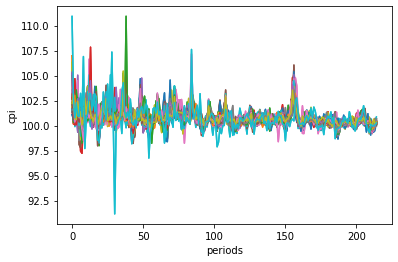

In [ ]:
plt.plot(data.values);
plt.plot(train_data.values);
plt.xlabel('periods')
plt.ylabel('cpi')
plt.show()

# auto ARIMA

In [ ]:
!pip install pmdarima -q

In [ ]:
from pmdarima.arima import auto_arima

## Training once, forecast for test_len period


In [ ]:
def get_metric(y_true, predict, horizon):
  rmse_reg = []
  nrmse_reg = []
  print('h\trmse\tnrmse')
  for h in [1,3,6,12]:
    rmse_reg.append(mean_squared_error(y_true[:h], predict[:h]) ** 0.5)
    nrmse_reg.append(mean_squared_error(y_true[:h], predict[:h]) ** 0.5 / np.mean(y_true[:h]) * 100)

    print('{}\t{:.4f}\t{:.4f}'.format(h, rmse_reg[-1], nrmse_reg[-1]))

  return rmse_reg, nrmse_reg


def plot_series(test, predict):
  plt.plot(test, label='test')
  plt.plot(predict, label='pred')
  plt.ylabel('cpi')
  plt.xlabel('periods')
  plt.legend()
  plt.show()

In [ ]:
rmse_list = []
nrmse_list = []

reg_name:  RF
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=6.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.071, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.078, Time=0.88 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.031, Time=0.88 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.071, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.032, Time=1.60 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.033, Time=2.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.078, Time=0.31 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.032, Time=4.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.033, Time=0.48 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.027, Time=1.00 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=0.140, Time=0.15 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.026, Time=1.35 sec
 ARIMA(0,1,2)(1,1,0)[12]             : OOB=0.111, Time=0.53 sec
 ARIMA(0,1,2)(2,1,1)[12]             : OOB=0.019,

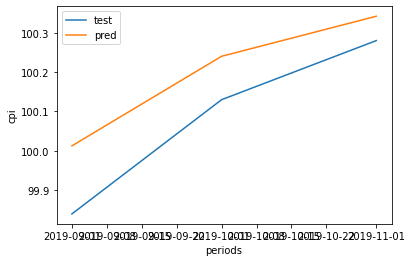

h	rmse	nrmse
1	0.1728	0.1731
3	0.1236	0.1235
6	0.1236	0.1235
12	0.1236	0.1235
reg_name:  BEL
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.066, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.124, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.040, Time=0.81 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.258, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.033, Time=0.91 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.250, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.006, Time=2.07 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.127, Time=0.96 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.010, Time=3.65 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=6.01 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.149, Time=1.43 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=0.007, Time=2.63 sec
 ARIMA(0,1,2)(2,1,1)[12]            

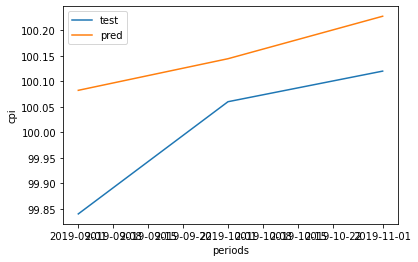

h	rmse	nrmse
1	0.2423	0.2427
3	0.1606	0.1606
6	0.1606	0.1606
12	0.1606	0.1606
reg_name:  BRY
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.052, Time=1.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.162, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.333, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.061, Time=0.84 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.60 sec
 ARIMA(1,1,1)(1,1,1)[12]             : OOB=inf, Time=2.65 sec
 ARIMA(1,1,1)(0,1,2)[12]             : OOB=inf, Time=4.42 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=inf, Time=1.82 sec
 ARIMA(1,1,1)(1,1,2)[12]             : OOB=inf, Time=6.72 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.054, Time=0.63 sec
 ARIMA(2,1,1)(0,1,1)[12]             : OOB=inf, Time=2.51 sec
 ARIMA(1,1,2)(0,1,1)[12]             : OOB=inf, Time=2.90 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.051, Time=0.53 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf

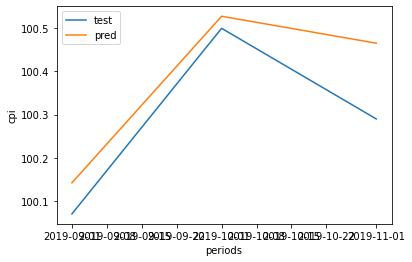

h	rmse	nrmse
1	0.0720	0.0720
3	0.1107	0.1104
6	0.1107	0.1104
12	0.1107	0.1104
reg_name:  VLA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.358, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.130, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.78 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.264, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.130, Time=0.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.066, Time=2.02 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=0.90 sec
 ARIMA(1,1,0)(2,1,2)[12]             : OOB=inf, Time=3.30 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.061, Time=2.77 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=inf, Time=1.84 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.68 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=inf, Time=2.10 sec
 ARIMA(2,1,0)(1,1,2)[12]             : OOB=inf

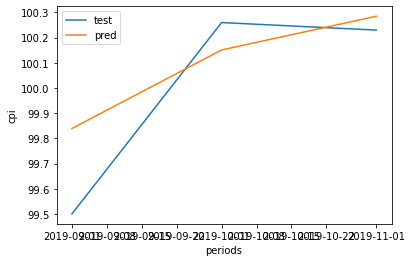

h	rmse	nrmse
1	0.3393	0.3410
3	0.2082	0.2082
6	0.2082	0.2082
12	0.2082	0.2082
reg_name:  VOR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.126, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.172, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.85 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.198, Time=0.19 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.077, Time=0.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.081, Time=0.68 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.082, Time=1.59 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.073, Time=2.85 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=0.076, Time=2.42 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.078, Time=1.74 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=inf, Time=3.28 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=3.92 sec
 ARIMA(1,1,1)(1,1,2)[12]             : O

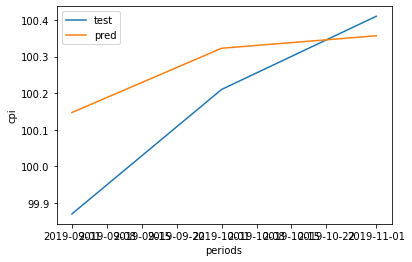

h	rmse	nrmse
1	0.2770	0.2774
3	0.1754	0.1751
6	0.1754	0.1751
12	0.1754	0.1751
reg_name:  IVA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.133, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.327, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.158, Time=0.74 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.359, Time=0.29 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.379, Time=0.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.390, Time=0.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.149, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.325, Time=0.16 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=0.135, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 5.825 seconds


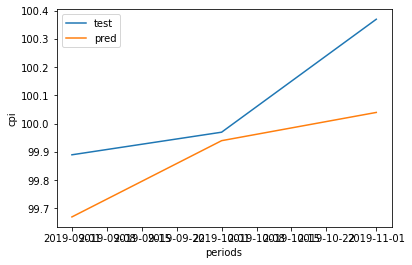

h	rmse	nrmse
1	0.2200	0.2202
3	0.2296	0.2295
6	0.2296	0.2295
12	0.2296	0.2295
reg_name:  KAL
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.058, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.037, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.025, Time=0.81 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.051, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.026, Time=0.98 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.026, Time=1.99 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.050, Time=0.31 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.026, Time=3.31 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.010, Time=0.42 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.008, Time=0.62 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.039, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.008, Time=1.68 sec
 ARIMA(0,1,0)(2,1,0)[12]          

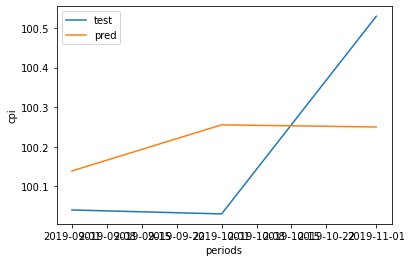

h	rmse	nrmse
1	0.0987	0.0987
3	0.2152	0.2148
6	0.2152	0.2148
12	0.2152	0.2148
reg_name:  KOS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.88 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.117, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.165, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.025, Time=0.82 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.133, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.027, Time=1.02 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.028, Time=2.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.123, Time=0.34 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=6.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.166, Time=0.43 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.008, Time=0.97 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.45 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.009, Time=1.03 sec
 ARIMA(0,1,2)(0,1,2)[12]             :

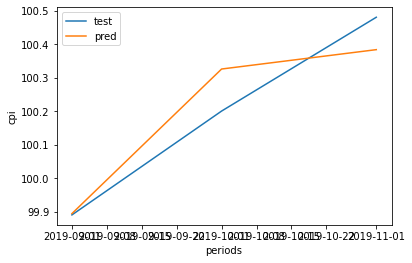

h	rmse	nrmse
1	0.0039	0.0039
3	0.0915	0.0913
6	0.0915	0.0913
12	0.0915	0.0913
reg_name:  KUR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.091, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.161, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.050, Time=0.69 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.100, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.051, Time=1.03 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.053, Time=1.79 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.115, Time=0.31 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.065, Time=2.61 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.045, Time=0.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.047, Time=0.59 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.047, Time=1.31 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.162, Time=0.19 sec
 ARIMA(0,1,0)(1,1,2)[12]          

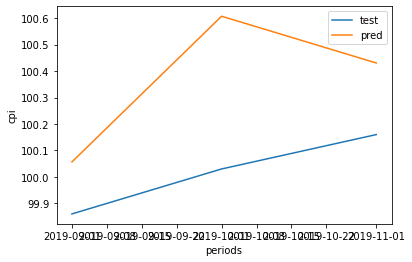

h	rmse	nrmse
1	0.1966	0.1969
3	0.3853	0.3852
6	0.3853	0.3852
12	0.3853	0.3852
reg_name:  LIP
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.217, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.213, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.112, Time=0.69 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.296, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.113, Time=1.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.114, Time=1.73 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.252, Time=0.34 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.114, Time=3.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.077, Time=0.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.077, Time=0.59 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.190, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.077, Time=1.49 sec
 ARIMA(0,1,0)(2,1,0)[12]          

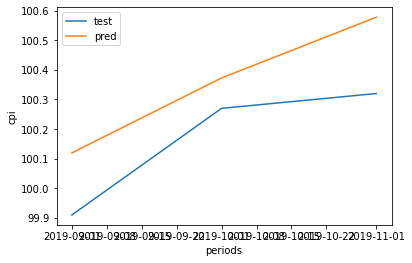

h	rmse	nrmse
1	0.2096	0.2098
3	0.2007	0.2004
6	0.2007	0.2004
12	0.2007	0.2004
reg_name:  MOS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.012, Time=1.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.022, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.072, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.009, Time=0.72 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.001, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.043, Time=0.30 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.007, Time=0.97 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.64 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=0.052, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.045, Time=0.10 sec
 ARIMA(1,1,2)(0,1,0)[12]             : OOB=inf, Time=0.88 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : OOB=0.001, Time=0.29 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 5.643 seconds


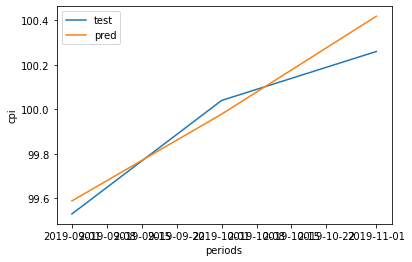

h	rmse	nrmse
1	0.0584	0.0587
3	0.1038	0.1038
6	0.1038	0.1038
12	0.1038	0.1038
reg_name:  ORL
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.080, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.073, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.009, Time=0.85 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.125, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.009, Time=1.01 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.099, Time=0.28 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.013, Time=2.24 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=4.87 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.009, Time=2.23 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.038, Time=0.78 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.024, Time=4.65 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.006, Time=0.58 sec
 ARIMA(0,1,0)(0,1,1)[12]            

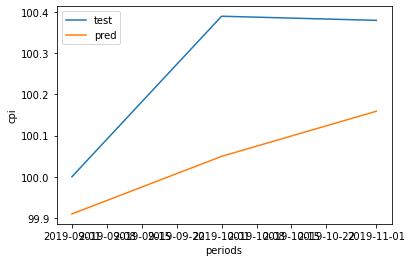

h	rmse	nrmse
1	0.0903	0.0903
3	0.2400	0.2394
6	0.2400	0.2394
12	0.2400	0.2394
reg_name:  RYA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.384, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.721, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.54 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.777, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.65 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.364, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.62 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.331, Time=0.14 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.645, Time=0.40 sec
 ARIMA(2,1,0)(0,1,1)[12]             : OOB=inf, Time=1.80 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB=inf

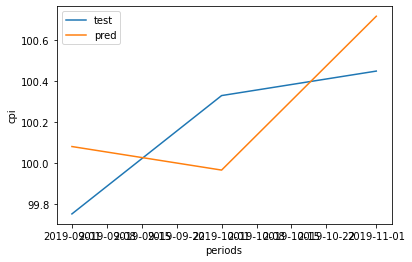

h	rmse	nrmse
1	0.3302	0.3311
3	0.3239	0.3233
6	0.3239	0.3233
12	0.3239	0.3233
reg_name:  SMO
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.476, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.215, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.126, Time=0.80 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.451, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.118, Time=1.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.274, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.113, Time=2.07 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.210, Time=0.84 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.118, Time=2.78 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.116, Time=3.77 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.257, Time=1.57 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=inf, Time=5.12 sec
 ARIMA(0,1,2)(2,1,1)[12]            

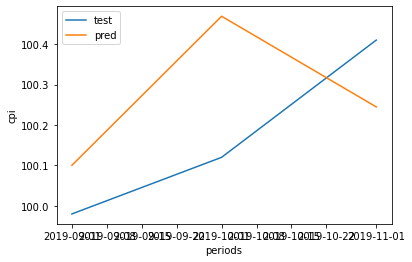

h	rmse	nrmse
1	0.1203	0.1203
3	0.2335	0.2331
6	0.2335	0.2331
12	0.2335	0.2331
reg_name:  TAM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.083, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.062, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.92 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.042, Time=0.19 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.243, Time=0.91 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.070, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.72 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.081, Time=0.12 sec
 ARIMA(2,1,1)(0,1,0)[12]             : OOB=inf, Time=0.79 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : OOB=0.042, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 7.183 seconds


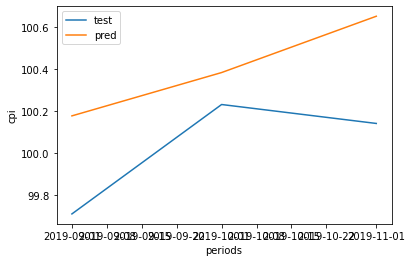

h	rmse	nrmse
1	0.4660	0.4674
3	0.4082	0.4081
6	0.4082	0.4081
12	0.4082	0.4081
reg_name:  TVE
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.395, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.505, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.372, Time=0.80 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.770, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.372, Time=1.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.716, Time=0.75 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.333, Time=2.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.561, Time=0.82 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.301, Time=4.71 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.376, Time=4.15 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=0.210, Time=3.15 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.235, Time=2.76 sec
 ARIMA(0,1,0)(2,1,1)[12]          

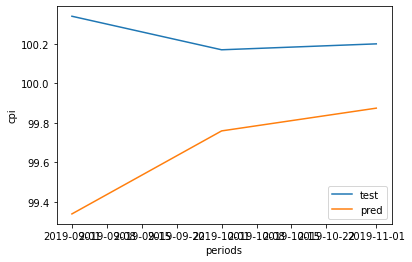

h	rmse	nrmse
1	1.0019	0.9985
3	0.6530	0.6514
6	0.6530	0.6514
12	0.6530	0.6514
reg_name:  TUL
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.85 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.265, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.350, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.87 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.396, Time=0.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.56 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=0.74 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.258, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.76 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.240, Time=0.81 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.246, Time=2.17 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.336, Time=3.77 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=0.250, Time=1.70 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB

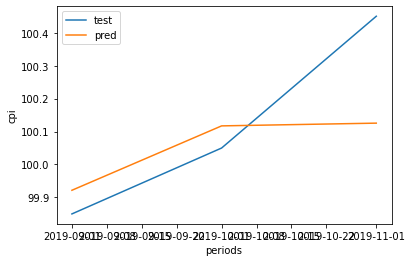

h	rmse	nrmse
1	0.0718	0.0719
3	0.1957	0.1955
6	0.1957	0.1955
12	0.1957	0.1955
reg_name:  YAR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.057, Time=1.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.111, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.017, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.069, Time=0.79 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.096, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.033, Time=0.71 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.075, Time=0.75 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.040, Time=0.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.078, Time=1.89 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.012, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.033, Time=0.54 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.083, Time=0.62 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.036, Time=0.54 sec
 ARIMA(0,1,0)(2,1,1)[12]        

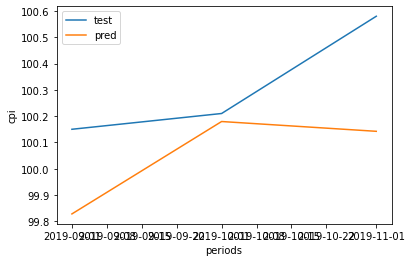

h	rmse	nrmse
1	0.3220	0.3215
3	0.3143	0.3133
6	0.3143	0.3133
12	0.3143	0.3133
reg_name:  MOW
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.076, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.092, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.022, Time=0.74 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.114, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.021, Time=0.97 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.103, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.012, Time=2.34 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.060, Time=0.84 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.022, Time=4.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.023, Time=3.03 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.019, Time=1.48 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=0.013, Time=4.33 sec
 ARIMA(0,1,2)(2,1,1)[12]          

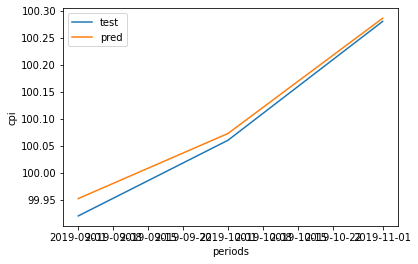

h	rmse	nrmse
1	0.0321	0.0321
3	0.0202	0.0202
6	0.0202	0.0202
12	0.0202	0.0202
reg_name:  KAR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.117, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.062, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.007, Time=0.77 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.065, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.007, Time=1.01 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.007, Time=1.77 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.005, Time=3.28 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.005, Time=4.83 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.006, Time=2.07 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=0.021, Time=3.05 sec
 ARIMA(1,1,1)(2,1,2)[12]             : OOB=inf, Time=9.46 sec
 ARIMA(0,1,2)(2,1,2)[12]             : OOB=inf, Time=6.66 sec
 ARIMA(1,1,0)(2,1,2)[12]             :

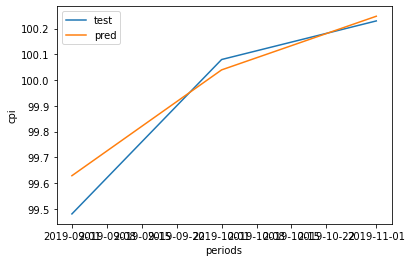

h	rmse	nrmse
1	0.1485	0.1493
3	0.0895	0.0895
6	0.0895	0.0895
12	0.0895	0.0895
reg_name:  KOM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.195, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.082, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.104, Time=0.69 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.198, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.094, Time=0.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.109, Time=0.87 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.100, Time=0.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=2.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.070, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.088, Time=0.52 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.103, Time=0.72 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.094, Time=0.57 sec
 ARIMA(0,1,0)(2,1,1)[12]            

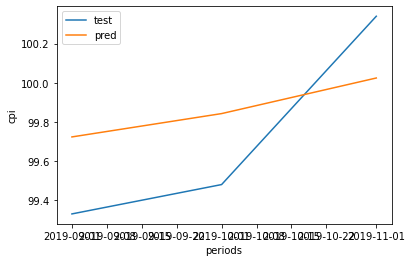

h	rmse	nrmse
1	0.3934	0.3960
3	0.3586	0.3596
6	0.3586	0.3596
12	0.3586	0.3596
reg_name:  ARK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.065, Time=1.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.196, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.153, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.103, Time=0.77 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.50 sec
 ARIMA(1,1,1)(1,1,1)[12]             : OOB=inf, Time=2.60 sec
 ARIMA(1,1,1)(0,1,2)[12]             : OOB=inf, Time=6.67 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=inf, Time=1.82 sec
 ARIMA(1,1,1)(1,1,2)[12]             : OOB=inf, Time=7.46 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.158, Time=0.61 sec
 ARIMA(2,1,1)(0,1,1)[12]             : OOB=inf, Time=2.92 sec
 ARIMA(1,1,2)(0,1,1)[12]             : OOB=inf, Time=2.71 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.211, Time=0.42 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.0

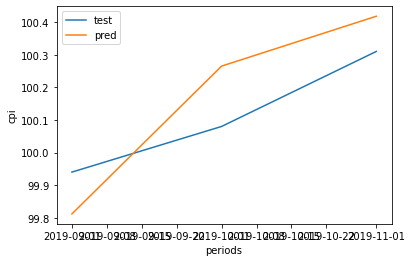

h	rmse	nrmse
1	0.1282	0.1283
3	0.1442	0.1440
6	0.1442	0.1440
12	0.1442	0.1440
reg_name:  VLG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.094, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.089, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.038, Time=0.75 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.184, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.033, Time=1.00 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.107, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.023, Time=2.13 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.043, Time=0.74 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.036, Time=5.05 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=5.88 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.068, Time=2.55 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=0.021, Time=3.10 sec
 ARIMA(1,1,1)(1,1,1)[12]            

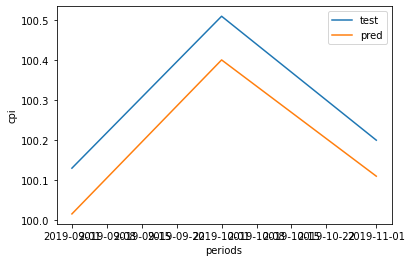

h	rmse	nrmse
1	0.1145	0.1143
3	0.1051	0.1048
6	0.1051	0.1048
12	0.1051	0.1048
reg_name:  KAG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.626, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.272, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.211, Time=0.74 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.510, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.178, Time=0.96 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.271, Time=0.35 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.196, Time=2.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.147, Time=2.79 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.179, Time=1.88 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.163, Time=3.41 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.491, Time=2.25 sec
 ARIMA(1,1,1)(1,1,2)[12]             : OOB=inf, Time=5.41 sec
 ARIMA(0,1,2)(1,1,2)[12]            

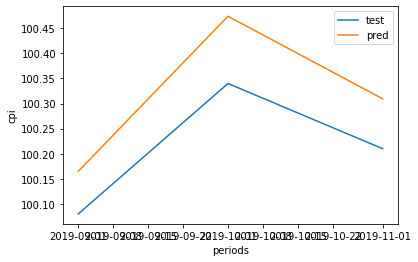

h	rmse	nrmse
1	0.0850	0.0849
3	0.1081	0.1079
6	0.1081	0.1079
12	0.1081	0.1079
reg_name:  LEN
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.013, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.023, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.008, Time=0.77 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.019, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.008, Time=1.06 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.008, Time=1.83 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.026, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=5.65 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.026, Time=0.42 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.007, Time=0.96 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=0.040, Time=0.18 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.007, Time=1.28 sec
 ARIMA(0,1,2)(1,1,0)[12]            

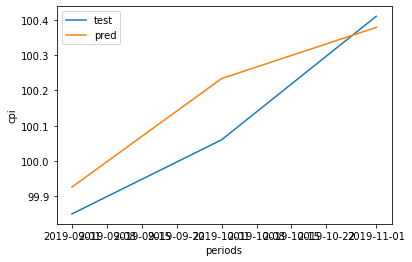

h	rmse	nrmse
1	0.0761	0.0762
3	0.1109	0.1108
6	0.1109	0.1108
12	0.1109	0.1108
reg_name:  MUR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.025, Time=1.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.029, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.022, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.030, Time=0.66 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.022, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.017, Time=0.55 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.017, Time=0.75 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=0.017, Time=1.44 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.016, Time=3.86 sec
 ARIMA(1,1,0)(2,1,2)[12]             : OOB=0.016, Time=3.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.019, Time=1.89 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=inf, Time=4.60 sec
 ARIMA(2,1,0)(2,1,2)[12]             : OOB=0.012, Time=4.80 sec
 ARIMA(2,1,0)(1,1,2)[12]          

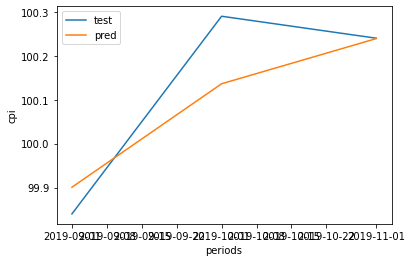

h	rmse	nrmse
1	0.0607	0.0608
3	0.0954	0.0953
6	0.0954	0.0953
12	0.0954	0.0953
reg_name:  NGR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.01 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.076, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.099, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.075, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.119, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.074, Time=0.94 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.112, Time=0.32 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.066, Time=2.28 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.119, Time=0.79 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=inf, Time=6.66 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.077, Time=3.33 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.093, Time=1.55 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=inf, Time=5.97 sec
 ARIMA(0,1,2)(2,1,1)[12]             :

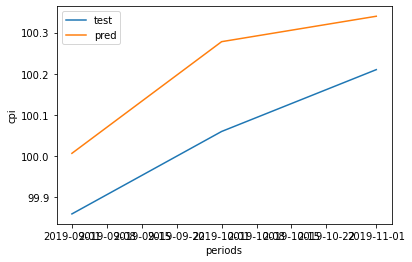

h	rmse	nrmse
1	0.1470	0.1472
3	0.1691	0.1691
6	0.1691	0.1691
12	0.1691	0.1691
reg_name:  PSK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.074, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.043, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.061, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.022, Time=0.67 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.040, Time=2.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.039, Time=0.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.018, Time=0.48 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.042, Time=0.20 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.048, Time=1.70 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.044, Time=0.71 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.022, Time=0.75 sec
 ARIMA(1,1,1)(2,1,0)[12]            

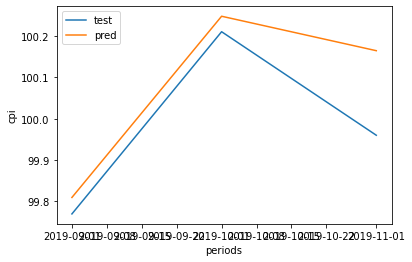

h	rmse	nrmse
1	0.0397	0.0398
3	0.1220	0.1221
6	0.1220	0.1221
12	0.1220	0.1221
reg_name:  SPB
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.135, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.056, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.00 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.107, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.123, Time=0.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=0.93 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.74 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.062, Time=1.95 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.072, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.061, Time=0.39 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=inf, Time=1.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.061, Time=0.31 sec
 ARIMA(2,1,1)(1,1,0)[12]             : OOB

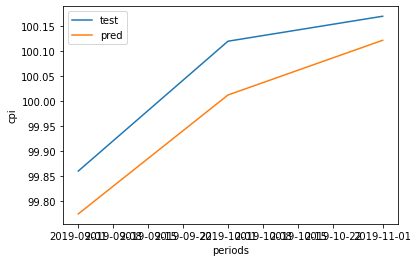

h	rmse	nrmse
1	0.0858	0.0859
3	0.0842	0.0842
6	0.0842	0.0842
12	0.0842	0.0842
reg_name:  ADY
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.485, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.165, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.475, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.130, Time=0.70 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.05 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.148, Time=0.52 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.181, Time=0.99 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=inf, Time=3.87 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.135, Time=1.00 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=0.169, Time=1.55 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : OOB

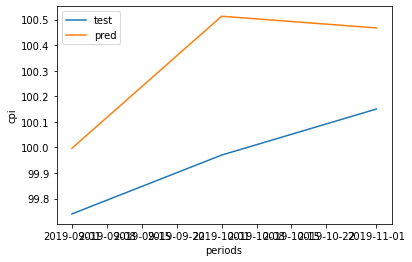

h	rmse	nrmse
1	0.2567	0.2573
3	0.3921	0.3923
6	0.3921	0.3923
12	0.3921	0.3923
reg_name:  KLM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.85 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.297, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.552, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.728, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.584, Time=0.60 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.450, Time=0.72 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.491, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.434, Time=1.81 sec
 ARIMA(1,1,0)(2,1,2)[12]             : OOB=0.468, Time=3.43 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.432, Time=2.66 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=0.463, Time=1.31 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.583, Time=2.08 sec
 ARIMA(2,1,0)(1,1,2)[12]            

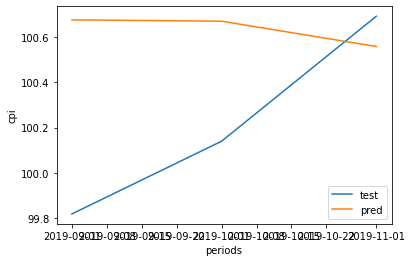

h	rmse	nrmse
1	0.8541	0.8557
3	0.5849	0.5836
6	0.5849	0.5836
12	0.5849	0.5836
reg_name:  KRA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.099, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.130, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.049, Time=0.75 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.270, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.040, Time=1.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.129, Time=0.37 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.014, Time=2.29 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.071, Time=0.95 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.004, Time=4.56 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.049, Time=3.54 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=0.009, Time=2.97 sec
 ARIMA(1,1,1)(2,1,2)[12]             : OOB=inf, Time=7.56 sec
 ARIMA(0,1,2)(2,1,2)[12]            

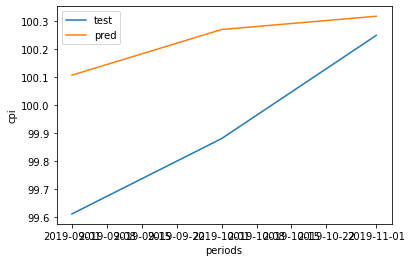

h	rmse	nrmse
1	0.4973	0.4992
3	0.3673	0.3677
6	0.3673	0.3677
12	0.3673	0.3677
reg_name:  AST
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.531, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.443, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.509, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.252, Time=0.66 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.117, Time=2.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.117, Time=0.81 sec
 ARIMA(1,1,0)(2,1,2)[12]             : OOB=0.149, Time=2.83 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.153, Time=2.30 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=1.87 sec
 ARIMA(2,1,0)(2,1,1)[12]             : OOB=0.110, Time=3.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB=0.122, Time=1.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             :

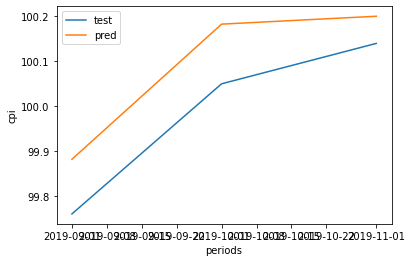

h	rmse	nrmse
1	0.1217	0.1220
3	0.1098	0.1098
6	0.1098	0.1098
12	0.1098	0.1098
reg_name:  VGG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.115, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.077, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.007, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.244, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.005, Time=0.95 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.109, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.015, Time=2.01 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.051, Time=3.69 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.026, Time=1.86 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.019, Time=0.88 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.094, Time=3.83 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.012, Time=0.59 sec
 ARIMA(1,1,1)(1,1,1)[12]          

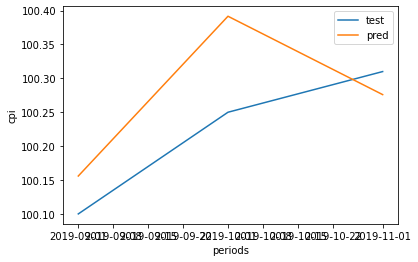

h	rmse	nrmse
1	0.0559	0.0558
3	0.0901	0.0899
6	0.0901	0.0899
12	0.0901	0.0899
reg_name:  ROS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.082, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.283, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.199, Time=0.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.453, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.185, Time=0.96 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.310, Time=0.36 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.138, Time=2.08 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.214, Time=0.90 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.151, Time=4.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.184, Time=3.82 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.185, Time=1.48 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=inf, Time=5.16 sec
 ARIMA(0,1,2)(2,1,1)[12]            

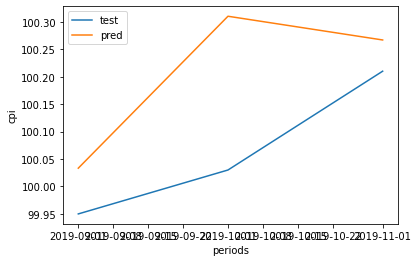

h	rmse	nrmse
1	0.0833	0.0834
3	0.1719	0.1718
6	0.1719	0.1718
12	0.1719	0.1718
reg_name:  DAG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.779, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.832, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.296, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=1.023, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.313, Time=0.91 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.312, Time=1.81 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.989, Time=0.33 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.295, Time=3.02 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.305, Time=4.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.307, Time=1.85 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.432, Time=1.97 sec
 ARIMA(1,1,1)(1,1,2)[12]             : OOB=inf, Time=6.60 sec
 ARIMA(0,1,2)(1,1,2)[12]            

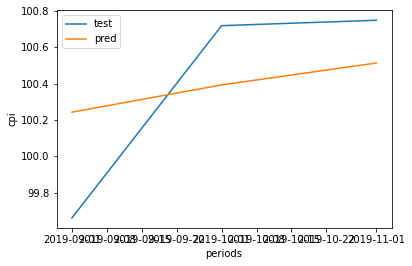

h	rmse	nrmse
1	0.5831	0.5851
3	0.4092	0.4077
6	0.4092	0.4077
12	0.4092	0.4077
reg_name:  ING
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.250, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.735, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.73 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.682, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.349, Time=0.45 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.242, Time=0.62 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.241, Time=1.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.622, Time=0.48 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=0.247, Time=2.11 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.241, Time=1.92 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.275, Time=1.86 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=inf, Time=2.14 sec
 ARIMA(1,1,1)(2,1,1)[12]             :

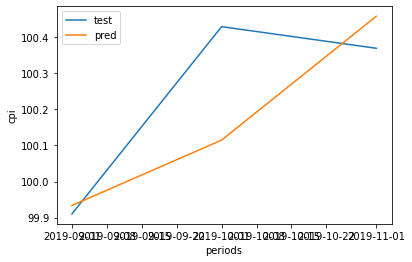

h	rmse	nrmse
1	0.0233	0.0233
3	0.1894	0.1890
6	0.1894	0.1890
12	0.1894	0.1890
reg_name:  KAB
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.981, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.448, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.83 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.762, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.346, Time=0.66 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.087, Time=1.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.077, Time=0.78 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.092, Time=0.65 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.106, Time=2.69 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=0.069, Time=1.53 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.104, Time=1.15 sec
 ARIMA(2,1,0)(0,1,2)[12]             : OOB=0.093, Time=1.97 sec
 ARIMA(1,1,1)(0,1,2)[12]            

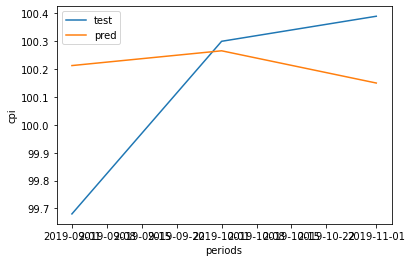

h	rmse	nrmse
1	0.5328	0.5345
3	0.3379	0.3375
6	0.3379	0.3375
12	0.3379	0.3375
reg_name:  KAO
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.530, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.403, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.81 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.563, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.338, Time=0.70 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=2.86 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.190, Time=0.87 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.74 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.187, Time=2.30 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=0.189, Time=1.70 sec
 ARIMA(1,1,0)(2,1,2)[12]             : OOB=0.199, Time=3.21 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.193, Time=1.93 sec
 ARIMA(2,1,0)(1,1,2)[12]             : O

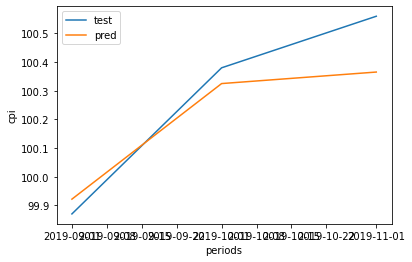

h	rmse	nrmse
1	0.0516	0.0516
3	0.1206	0.1203
6	0.1206	0.1203
12	0.1206	0.1203
reg_name:  NOR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.720, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.618, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.189, Time=0.81 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=inf, Time=0.33 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.181, Time=1.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.476, Time=0.43 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.191, Time=2.72 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.195, Time=2.69 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.172, Time=2.01 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.323, Time=1.14 sec
 ARIMA(1,1,1)(0,1,2)[12]             : OOB=inf, Time=4.05 sec
 ARIMA(0,1,2)(0,1,2)[12]             : OOB=inf, Time=5.55 sec
 ARIMA(1,1,0)(0,1,2)[12]             : O

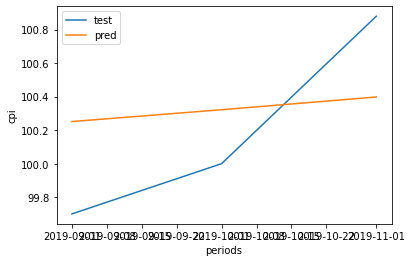

h	rmse	nrmse
1	0.5514	0.5530
3	0.4619	0.4610
6	0.4619	0.4610
12	0.4619	0.4610
reg_name:  STA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.132, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.340, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.56 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.338, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.94 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.136, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.195, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=0.136, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 7.455 seconds


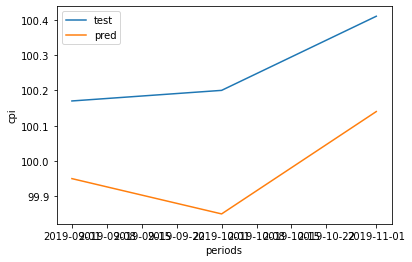

h	rmse	nrmse
1	0.2200	0.2196
3	0.2851	0.2843
6	0.2851	0.2843
12	0.2851	0.2843
reg_name:  BAS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.172, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.147, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.070, Time=0.73 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.128, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.069, Time=1.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.141, Time=0.29 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.072, Time=2.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.071, Time=2.48 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.069, Time=1.82 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.118, Time=0.65 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.058, Time=3.86 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=0.150, Time=2.76 sec
 ARIMA(1,1,1)(2,1,2)[12]          

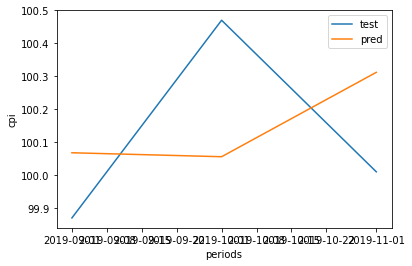

h	rmse	nrmse
1	0.1978	0.1980
3	0.3172	0.3168
6	0.3172	0.3168
12	0.3172	0.3168
reg_name:  MAR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.064, Time=1.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.320, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.259, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.064, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.351, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.063, Time=0.88 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.343, Time=0.32 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.052, Time=2.00 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.152, Time=0.77 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.049, Time=3.88 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.066, Time=3.14 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=0.084, Time=3.32 sec
 ARIMA(1,1,1)(2,1,2)[12]             : OOB=0.056, Time=4.87 sec
 ARIMA(0,1,2)(2,1,2)[12]        

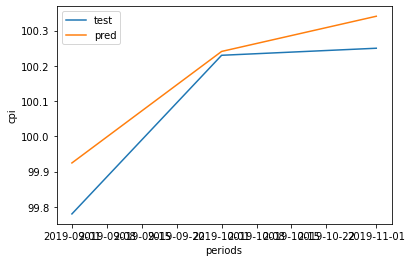

h	rmse	nrmse
1	0.1446	0.1449
3	0.0988	0.0987
6	0.0988	0.0987
12	0.0988	0.0987
reg_name:  MOR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.064, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.102, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.81 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.140, Time=0.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.073, Time=0.43 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.076, Time=0.55 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.049, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.059, Time=0.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.061, Time=0.88 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.051, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.59 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.073, Time=0.16 sec
 ARIMA(2,1,1)(0,1,0)[12]             :

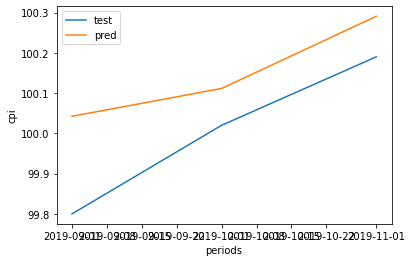

h	rmse	nrmse
1	0.2423	0.2428
3	0.1605	0.1605
6	0.1605	0.1605
12	0.1605	0.1605
reg_name:  TAT
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.053, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.025, Time=0.67 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.027, Time=0.71 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.045, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.011, Time=0.69 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.015, Time=1.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.014, Time=0.70 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.042, Time=1.02 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.015, Time=0.94 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=inf, Time=3.21 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.033, Time=1.15 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=inf, Time=5.24 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   :

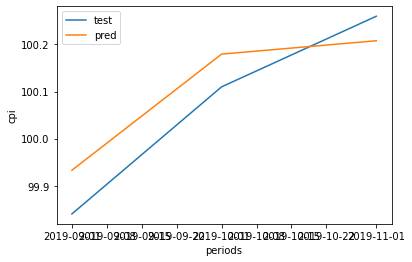

h	rmse	nrmse
1	0.0928	0.0929
3	0.0734	0.0733
6	0.0734	0.0733
12	0.0734	0.0733
reg_name:  UDM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.095, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.179, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.040, Time=0.78 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.088, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.043, Time=0.93 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.042, Time=1.94 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.172, Time=0.33 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=6.99 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.053, Time=0.37 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.022, Time=0.99 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.55 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.026, Time=1.25 sec
 ARIMA(0,1,2)(0,1,2)[12]             :

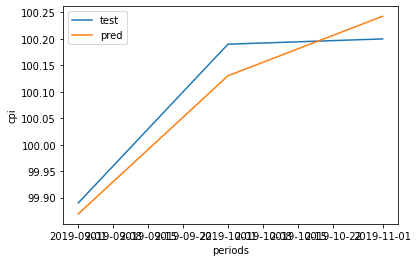

h	rmse	nrmse
1	0.0208	0.0208
3	0.0441	0.0440
6	0.0441	0.0440
12	0.0441	0.0440
reg_name:  CHV
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.544, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.453, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.150, Time=0.77 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.792, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.159, Time=1.07 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.161, Time=1.76 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.574, Time=0.33 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.162, Time=3.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.249, Time=0.43 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.123, Time=0.87 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.39 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.129, Time=1.37 sec
 ARIMA(0,1,2)(0,1,2)[12]            

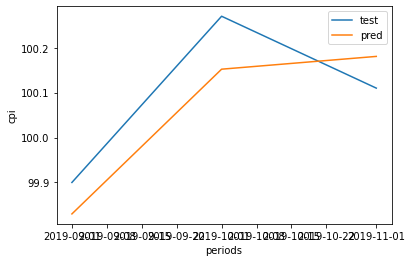

h	rmse	nrmse
1	0.0700	0.0701
3	0.0890	0.0889
6	0.0890	0.0889
12	0.0890	0.0889
reg_name:  PER
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.059, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.098, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.94 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.097, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.017, Time=0.42 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.012, Time=0.66 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.011, Time=2.38 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.054, Time=0.46 sec
 ARIMA(0,1,0)(2,1,2)[12]             : OOB=inf, Time=4.75 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.012, Time=2.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.007, Time=2.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=0.97 sec
 ARIMA(1,1,0)(2,1,0)[12]             : O

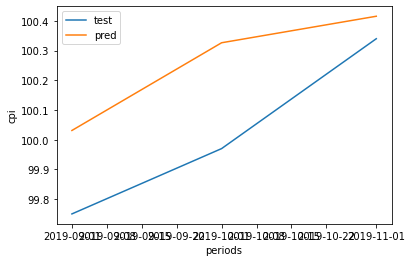

h	rmse	nrmse
1	0.2810	0.2817
3	0.2657	0.2656
6	0.2657	0.2656
12	0.2657	0.2656
reg_name:  KIR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.073, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.066, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.021, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.181, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.021, Time=0.96 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.021, Time=1.93 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.077, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.030, Time=2.67 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.043, Time=0.35 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.013, Time=1.01 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.65 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.013, Time=1.33 sec
 ARIMA(0,1,2)(1,1,0)[12]            

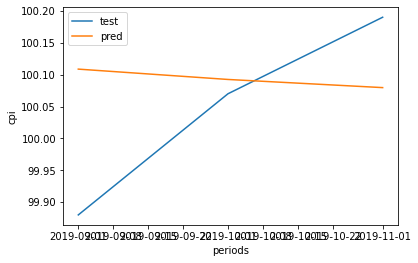

h	rmse	nrmse
1	0.2286	0.2289
3	0.1472	0.1471
6	0.1472	0.1471
12	0.1472	0.1471
reg_name:  NIZ
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.684, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.221, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.116, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.457, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.105, Time=0.91 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.260, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.105, Time=1.82 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.232, Time=0.77 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=inf, Time=5.83 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.168, Time=3.35 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=0.194, Time=1.55 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=inf, Time=4.77 sec
 ARIMA(0,1,2)(2,1,1)[12]             :

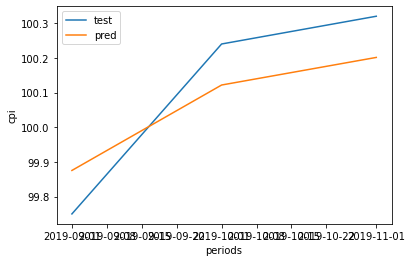

h	rmse	nrmse
1	0.1254	0.1257
3	0.1208	0.1207
6	0.1208	0.1207
12	0.1208	0.1207
reg_name:  ORE
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.81 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.079, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.173, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.097, Time=0.69 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.168, Time=0.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.088, Time=0.39 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.085, Time=0.61 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.089, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.125, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=0.081, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 4.941 seconds


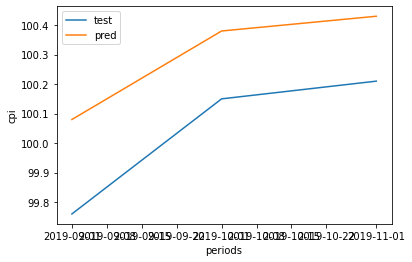

h	rmse	nrmse
1	0.3200	0.3208
3	0.2606	0.2605
6	0.2606	0.2605
12	0.2606	0.2605
reg_name:  PNZ
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.311, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.168, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.022, Time=0.80 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.256, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.021, Time=1.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.186, Time=0.32 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.021, Time=2.27 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.098, Time=0.81 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=inf, Time=5.66 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.017, Time=3.97 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.021, Time=1.89 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.106, Time=2.50 sec
 ARIMA(1,1,1)(1,1,2)[12]            

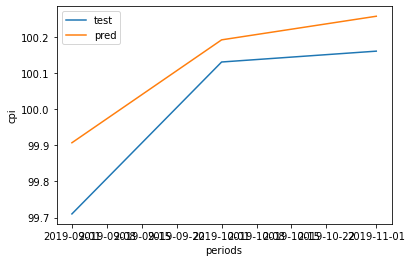

h	rmse	nrmse
1	0.1968	0.1973
3	0.1314	0.1314
6	0.1314	0.1314
12	0.1314	0.1314
reg_name:  SAM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.88 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.135, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.187, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.080, Time=0.72 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.161, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.086, Time=0.97 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.085, Time=2.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.203, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=5.59 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.068, Time=0.40 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.074, Time=0.60 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.073, Time=1.04 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.195, Time=0.20 sec
 ARIMA(0,1,0)(1,1,2)[12]            

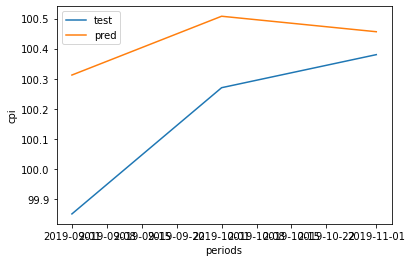

h	rmse	nrmse
1	0.4621	0.4628
3	0.3033	0.3028
6	0.3033	0.3028
12	0.3033	0.3028
reg_name:  SAR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.93 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.324, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.238, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.381, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.192, Time=0.70 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.80 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.172, Time=0.52 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.216, Time=0.22 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.29 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.42 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.305, Time=0.84 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=i

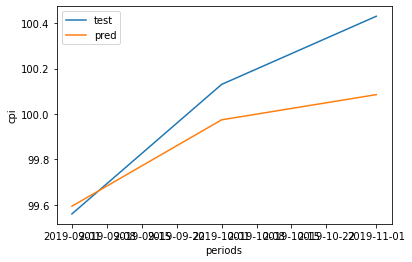

h	rmse	nrmse
1	0.0339	0.0341
3	0.2195	0.2194
6	0.2195	0.2194
12	0.2195	0.2194
reg_name:  ULY
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.047, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.123, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.42 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.132, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.71 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.046, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.63 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.054, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.137, Time=0.15 sec
 ARIMA(2,1,1)(0,1,0)[12]             : OOB=inf

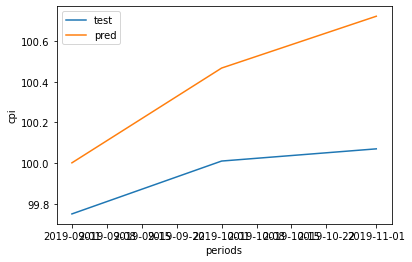

h	rmse	nrmse
1	0.2513	0.2519
3	0.4822	0.4825
6	0.4822	0.4825
12	0.4822	0.4825
reg_name:  KUG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.017, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.094, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.008, Time=0.77 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.039, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.009, Time=0.99 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.009, Time=1.93 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.076, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.012, Time=3.42 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.008, Time=0.42 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.007, Time=0.93 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.53 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.010, Time=1.21 sec
 ARIMA(0,1,2)(0,1,2)[12]            

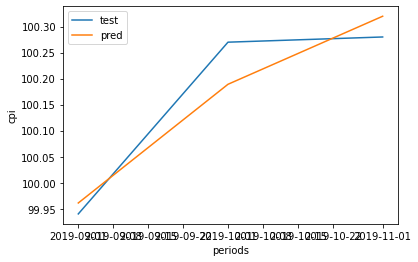

h	rmse	nrmse
1	0.0210	0.0210
3	0.0535	0.0534
6	0.0535	0.0534
12	0.0535	0.0534
reg_name:  SVE
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.220, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.130, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.019, Time=0.74 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.140, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.020, Time=0.96 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.021, Time=1.82 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.114, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.020, Time=3.82 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.091, Time=0.87 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.009, Time=1.10 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.66 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.009, Time=1.37 sec
 ARIMA(0,1,2)(1,1,0)[12]            

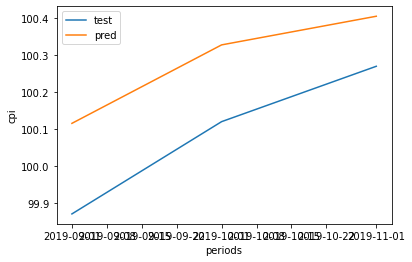

h	rmse	nrmse
1	0.2454	0.2457
3	0.2015	0.2014
6	0.2015	0.2014
12	0.2015	0.2014
reg_name:  TYU
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.033, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.156, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.146, Time=0.23 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.046, Time=0.92 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.048, Time=0.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.040, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.071, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=0.036, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 5.613 seconds


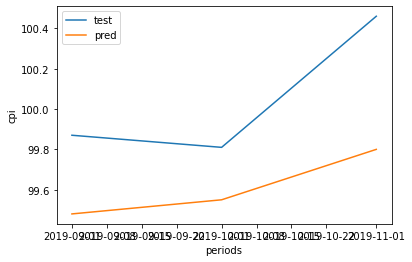

h	rmse	nrmse
1	0.3900	0.3905
3	0.4674	0.4672
6	0.4674	0.4672
12	0.4674	0.4672
reg_name:  CHE
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.013, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.009, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.014, Time=0.73 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.018, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.023, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.013, Time=0.86 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.013, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.020, Time=1.97 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.012, Time=0.20 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.007, Time=0.34 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.016, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.023, Time=0.92 sec
 ARIMA(2,1,0)(1,1,1)[12]          

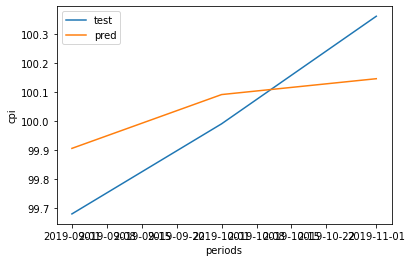

h	rmse	nrmse
1	0.2255	0.2262
3	0.1890	0.1889
6	0.1890	0.1889
12	0.1890	0.1889
reg_name:  ALI
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.99 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.425, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.235, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.315, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.234, Time=0.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=2.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.121, Time=0.76 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.67 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.101, Time=3.32 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=0.121, Time=1.48 sec
 ARIMA(1,1,0)(2,1,2)[12]             : OOB=0.102, Time=4.24 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=inf, Time=2.56 sec
 ARIMA(2,1,0)(1,1,2)[12]             : OOB

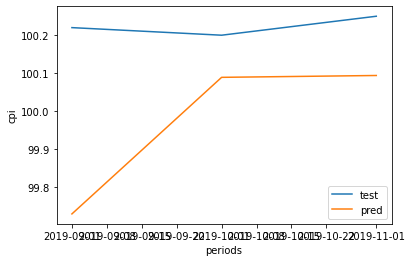

h	rmse	nrmse
1	0.4912	0.4901
3	0.3044	0.3038
6	0.3044	0.3038
12	0.3044	0.3038
reg_name:  TUV
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.053, Time=1.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.439, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.384, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.042, Time=0.91 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.373, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.043, Time=1.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.043, Time=2.47 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.347, Time=0.34 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=5.62 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.166, Time=0.40 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.050, Time=1.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.098, Time=0.65 sec
 ARIMA(1,1,2)(0,1,1)[12]             : OOB=inf, Time=2.70 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept  

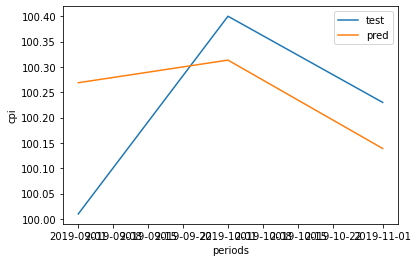

h	rmse	nrmse
1	0.2588	0.2588
3	0.1661	0.1657
6	0.1661	0.1657
12	0.1661	0.1657
reg_name:  KHK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.153, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.163, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.112, Time=0.81 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.308, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=inf, Time=1.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=inf, Time=2.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.307, Time=0.35 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=2.83 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.184, Time=0.40 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.085, Time=1.12 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.46 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=inf, Time=2.25 sec
 ARIMA(0,1,2)(0,1,2)[12]             : OOB=i

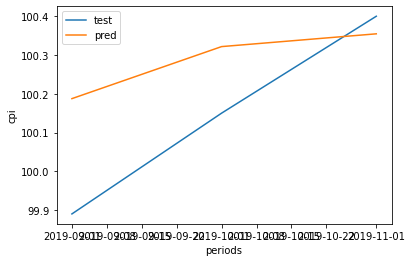

h	rmse	nrmse
1	0.2974	0.2978
3	0.2000	0.1997
6	0.2000	0.1997
12	0.2000	0.1997
reg_name:  ALT
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.141, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.114, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.93 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.102, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.021, Time=0.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.038, Time=1.37 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=0.062, Time=1.68 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.079, Time=2.81 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.012, Time=0.49 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.030, Time=0.60 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.063, Time=1.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.114, Time=0.24 sec
 ARIMA(0,1,0)(1,1,2)[12]            

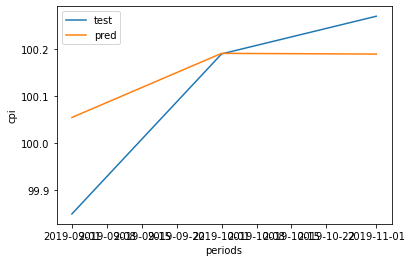

h	rmse	nrmse
1	0.2049	0.2053
3	0.1271	0.1270
6	0.1271	0.1270
12	0.1271	0.1270
reg_name:  KYA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.263, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.207, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.85 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.192, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.79 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.143, Time=0.78 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.146, Time=2.55 sec
 ARIMA(1,1,0)(1,1,2)[12]             : OOB=0.122, Time=2.74 sec
 ARIMA(1,1,0)(0,1,2)[12]             : OOB=0.168, Time=1.57 sec
 ARIMA(1,1,0)(2,1,2)[12]             : OOB=0.141, Time=3.65 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.248, Time=2.14 sec
 ARIMA(2,1,0)(1,1,2)[12]             : OOB=0.145, Time=3.82 sec
 ARIMA(1,1,1)(1,1,2)[12]             :

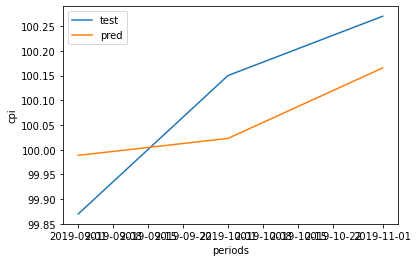

h	rmse	nrmse
1	0.1185	0.1187
3	0.1172	0.1171
6	0.1172	0.1171
12	0.1172	0.1171
reg_name:  IRK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.177, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.075, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.038, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.039, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.038, Time=0.86 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.022, Time=0.34 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.090, Time=0.90 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.056, Time=2.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.103, Time=0.22 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=inf, Time=1.69 sec
 ARIMA(0,1,2)(1,1,0)[12]             : OOB=0.018, Time=0.51 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=0.039, Time=0.28 sec
 ARIMA(0,1,2)(2,1,0)[12]            

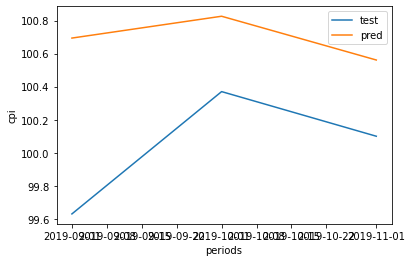

h	rmse	nrmse
1	1.0639	1.0678
3	0.7194	0.7191
6	0.7194	0.7191
12	0.7194	0.7191
reg_name:  KEM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.418, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.699, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.99 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.797, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.53 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.636, Time=0.69 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.378, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.463, Time=0.88 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.386, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.53 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.465, Time=0.13 sec
 ARIMA(2,1,1)(0,1,0)[12]             : OOB

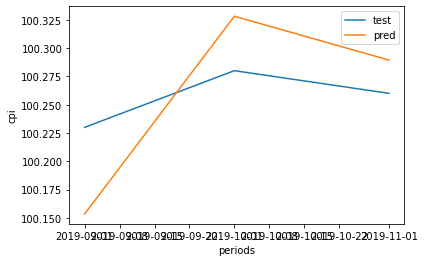

h	rmse	nrmse
1	0.0764	0.0762
3	0.0548	0.0547
6	0.0548	0.0547
12	0.0548	0.0547
reg_name:  NVS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.246, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.048, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.022, Time=0.66 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.028, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.022, Time=0.89 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.043, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.021, Time=2.02 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.038, Time=0.80 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.018, Time=4.31 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.017, Time=3.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.021, Time=1.75 sec
 ARIMA(0,1,0)(1,1,2)[12]             : OOB=0.020, Time=2.13 sec
 ARIMA(1,1,1)(1,1,2)[12]          

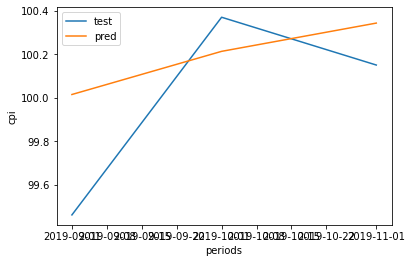

h	rmse	nrmse
1	0.5543	0.5574
3	0.3508	0.3508
6	0.3508	0.3508
12	0.3508	0.3508
reg_name:  OMS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.056, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.056, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.019, Time=0.83 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.166, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.018, Time=1.16 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.169, Time=0.35 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.022, Time=2.26 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=6.83 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.018, Time=2.25 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.013, Time=1.17 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.010, Time=0.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.012, Time=0.65 sec
 ARIMA(0,1,0)(1,1,0)[12]            

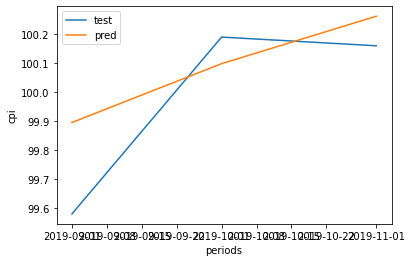

h	rmse	nrmse
1	0.3153	0.3166
3	0.1985	0.1985
6	0.1985	0.1985
12	0.1985	0.1985
reg_name:  TOM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.221, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.098, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.037, Time=1.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.229, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.032, Time=1.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.186, Time=0.37 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.032, Time=2.51 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=6.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.029, Time=2.28 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.090, Time=1.24 sec
 ARIMA(1,1,1)(0,1,2)[12]             : OOB=0.028, Time=3.03 sec
 ARIMA(1,1,1)(1,1,2)[12]             : OOB=inf, Time=7.63 sec
 ARIMA(1,1,1)(1,1,1)[12]             :

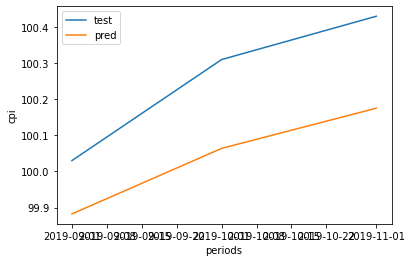

h	rmse	nrmse
1	0.1477	0.1477
3	0.2216	0.2210
6	0.2216	0.2210
12	0.2216	0.2210
reg_name:  BUR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.094, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.116, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.021, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.145, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=inf, Time=1.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=inf, Time=2.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.139, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=inf, Time=2.93 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.048, Time=0.57 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.006, Time=0.99 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.45 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=inf, Time=2.27 sec
 ARIMA(0,1,2)(0,1,2)[12]             : OOB=i

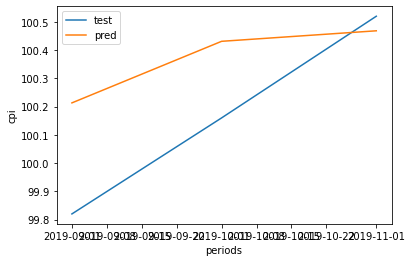

h	rmse	nrmse
1	0.3932	0.3939
3	0.2774	0.2769
6	0.2774	0.2769
12	0.2774	0.2769
reg_name:  SAH
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.086, Time=1.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.017, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.134, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.099, Time=0.86 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.083, Time=0.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.121, Time=0.57 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.127, Time=0.66 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.159, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.040, Time=0.15 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=0.039, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=0.018, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 4.562 seconds


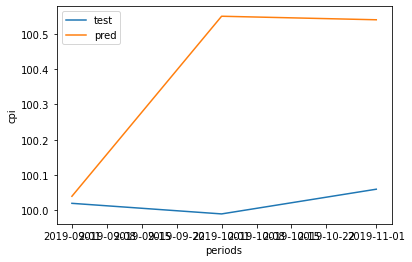

h	rmse	nrmse
1	0.0200	0.0200
3	0.4260	0.4259
6	0.4260	0.4259
12	0.4260	0.4259
reg_name:  ZAB
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.95 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.039, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.007, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.023, Time=0.86 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.043, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.008, Time=0.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.013, Time=0.87 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.013, Time=0.73 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.015, Time=2.00 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.014, Time=0.20 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.005, Time=0.36 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.039, Time=0.14 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.004, Time=0.92 sec
 ARIMA(2,1,0)(2,1,1)[12]          

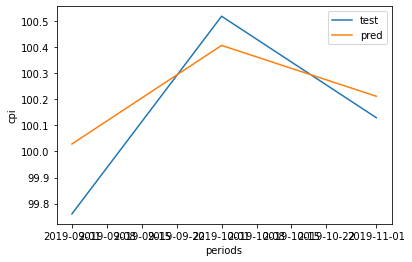

h	rmse	nrmse
1	0.2688	0.2695
3	0.1747	0.1745
6	0.1747	0.1745
12	0.1747	0.1745
reg_name:  KAM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.055, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.058, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.058, Time=0.16 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=1.00 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.034, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.79 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.044, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.47 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=inf, Time=0.44 sec
 ARIMA(2,1,1)(0,1,0)[12]             : OOB=inf, 

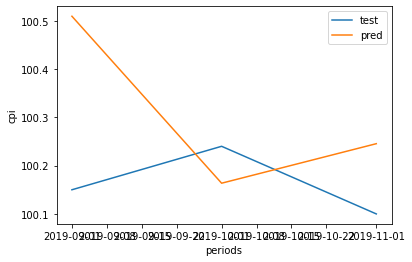

h	rmse	nrmse
1	0.3593	0.3587
3	0.2281	0.2277
6	0.2281	0.2277
12	0.2281	0.2277
reg_name:  PRI
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.020, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.066, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.012, Time=0.72 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.036, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.013, Time=1.05 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.013, Time=1.78 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.068, Time=0.33 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.012, Time=3.36 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.011, Time=0.51 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.013, Time=0.67 sec
 ARIMA(0,1,0)(0,1,2)[12]             : OOB=0.014, Time=1.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.059, Time=0.21 sec
 ARIMA(0,1,0)(1,1,2)[12]          

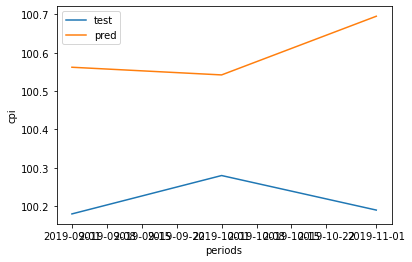

h	rmse	nrmse
1	0.3821	0.3814
3	0.3957	0.3948
6	0.3957	0.3948
12	0.3957	0.3948
reg_name:  KHA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.086, Time=1.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.081, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.052, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.081, Time=0.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.080, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.058, Time=0.71 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.083, Time=0.81 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.081, Time=0.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.078, Time=2.07 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.050, Time=0.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.056, Time=0.54 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=0.075, Time=0.68 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.077, Time=0.44 sec
 ARIMA(0,1,0)(2,1,1)[12]        

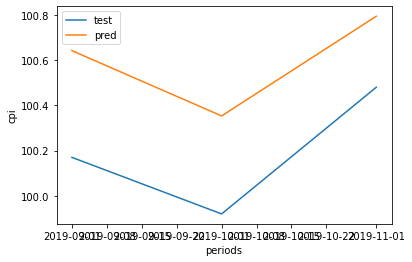

h	rmse	nrmse
1	0.4719	0.4711
3	0.4119	0.4111
6	0.4119	0.4111
12	0.4119	0.4111
reg_name:  AMU
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.041, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.041, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.003, Time=0.83 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.098, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.002, Time=0.91 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.058, Time=0.36 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.002, Time=2.15 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.024, Time=0.85 sec
 ARIMA(0,1,1)(2,1,2)[12]             : OOB=0.006, Time=3.80 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.004, Time=2.92 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.25 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=inf, Time=5.50 sec
 ARIMA(0,1,2)(2,1,1)[12]             :

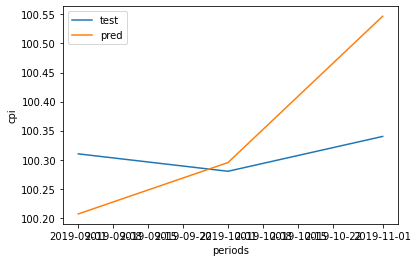

h	rmse	nrmse
1	0.1034	0.1031
3	0.1338	0.1334
6	0.1338	0.1334
12	0.1338	0.1334
reg_name:  MAG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.036, Time=1.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.181, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.328, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.028, Time=0.72 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.210, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.031, Time=1.01 sec
 ARIMA(0,1,1)(0,1,2)[12]             : OOB=0.032, Time=1.67 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.185, Time=0.34 sec
 ARIMA(0,1,1)(1,1,2)[12]             : OOB=0.043, Time=2.40 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=0.103, Time=0.42 sec
 ARIMA(0,1,2)(0,1,1)[12]             : OOB=0.027, Time=1.19 sec
 ARIMA(0,1,2)(0,1,0)[12]             : OOB=inf, Time=0.49 sec
 ARIMA(0,1,2)(1,1,1)[12]             : OOB=0.027, Time=1.41 sec
 ARIMA(0,1,2)(1,1,0)[12]          

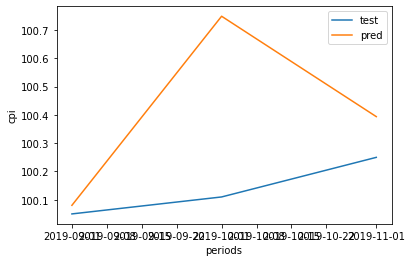

h	rmse	nrmse
1	0.0304	0.0304
3	0.3786	0.3781
6	0.3786	0.3781
12	0.3786	0.3781
reg_name:  SAK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.057, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.028, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.058, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.009, Time=0.69 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.43 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.04 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.013, Time=0.54 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.011, Time=0.90 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=inf, Time=3.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.011, Time=0.99 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=inf, Time=5.63 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : OOB=0

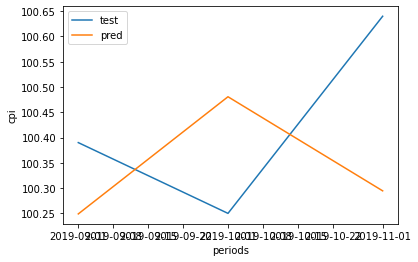

h	rmse	nrmse
1	0.1411	0.1405
3	0.2533	0.2522
6	0.2533	0.2522
12	0.2533	0.2522
reg_name:  JEW
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.093, Time=1.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.042, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.024, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.091, Time=0.74 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.026, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.035, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=0.064, Time=0.75 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=0.069, Time=0.58 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=0.069, Time=1.88 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.024, Time=0.20 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.022, Time=0.36 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.022, Time=0.26 sec
 ARIMA(2,1,0)(0,1,1)[12]             : OOB=0.082, Time=0.74 sec
 ARIMA(2,1,0)(1,1,1)[12]        

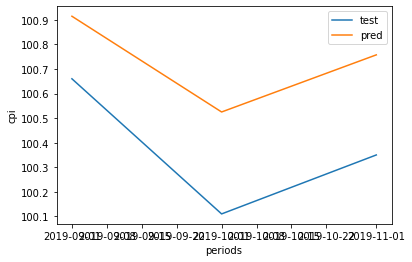

h	rmse	nrmse
1	0.2546	0.2529
3	0.3665	0.3651
6	0.3665	0.3651
12	0.3665	0.3651
reg_name:  CHU
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=0.195, Time=1.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.789, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.862, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=0.195, Time=0.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=inf, Time=0.35 sec
 ARIMA(0,1,1)(1,1,1)[12]             : OOB=0.188, Time=0.97 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.167, Time=0.68 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.124, Time=1.67 sec
 ARIMA(0,1,1)(2,1,1)[12]             : OOB=0.162, Time=2.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=1.914, Time=0.53 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0.130, Time=2.16 sec
 ARIMA(0,1,2)(2,1,0)[12]             : OOB=0.132, Time=2.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.692, Time=0.61 sec
 ARIMA(1,1,2)(2,1,0)[12]          

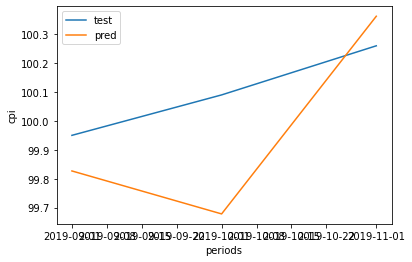

h	rmse	nrmse
1	0.1233	0.1233
3	0.2552	0.2550
6	0.2552	0.2550
12	0.2552	0.2550


In [ ]:
"""
for reg_name in reg_names:
  print('======================================================================')
  print('reg_name: ', reg_name)

  train = data[:-test_len][reg_name]
  test = data[-test_len:][reg_name]

  # find best params
  stepwise_model = auto_arima(train, start_p=1, start_q=1, max_p=4, max_q=4, m=12, start_P=0, seasonal=True, \
                              d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, \
                              out_of_sample_size = test_len, scoring = 'mse', information_criterion = 'oob')
  
  # fit model
  stepwise_model.fit(train)

  # make predict
  predict = stepwise_model.predict(n_periods=test_len)

  # draw results
  predict = pd.DataFrame(predict, index = test.index, columns=[reg_name])
  plot_series(test, predict[reg_name])

  # print results
  rmse_reg, nrmse_reg = get_metric(test.values, predict[reg_name].values, horizon=[1,3,6,12])

  rmse_list.append(rmse_reg)
  nrmse_list.append(nrmse_reg)
"""

Для ARIMA моделей попробовать взять разность логарифмов уровня цен. (Проверить на стационарность исходные ряды). Пока реализовано для исходных рядов.

## region average

In [ ]:
print('metric\horizon\th=1\th=3\th=6\th=12')
mean_rmse_list = np.mean(rmse_list, axis=0)
print('rmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_rmse_list[0], mean_rmse_list[1], mean_rmse_list[2], mean_rmse_list[3]))
mean_nrmse_list = np.mean(nrmse_list, axis=0)
print('nrmse (%)\t{:.2f}%\t{:.2f}%\t{:.2f}%\t{:.2f}%'.format(mean_nrmse_list[0], mean_nrmse_list[1], mean_nrmse_list[2], mean_nrmse_list[3]))

metric\horizon	h=1	h=3	h=6	h=12
rmse		0.2383	0.2336	0.2336	0.2336
nrmse (%)	0.24%	0.23%	0.23%	0.23%


## Training with sliding window (unrealised yet)

In [ ]:
"""future_forecast = []

for l in range(test_len,0,-1):
  train = data[reg_name][:-l]
  # test = data_train["cpi_sfo"].[data.index >= '2018-{:02}-01'.format(month)]

  stepwise_model.fit(train)
  future_forecast.append(stepwise_model.predict(n_periods=1))


future_forecast = pd.DataFrame(np.array(future_forecast), index = test.index, columns=[reg_name])
"""

'future_forecast = []\n\nfor l in range(test_len,0,-1):\n  train = data[reg_name][:-l]\n  # test = data_train["cpi_sfo"].[data.index >= \'2018-{:02}-01\'.format(month)]\n\n  stepwise_model.fit(train)\n  future_forecast.append(stepwise_model.predict(n_periods=1))\n\n\nfuture_forecast = pd.DataFrame(np.array(future_forecast), index = test.index, columns=[reg_name])\n'

In [ ]:
"""
print('rmse: {:.4f}'.format(mean_squared_error(test_data[reg_name].values, future_forecast[reg_name].values) ** 0.5))
print('normed rmse: {:.4f}%'.format(mean_squared_error(test_data[reg_name].values, 
                            future_forecast[reg_name].values) ** 0.5 / np.mean(test_data[reg_name].values) * 100))
"""  

"\nprint('rmse: {:.4f}'.format(mean_squared_error(test_data[reg_name].values, future_forecast[reg_name].values) ** 0.5))\nprint('normed rmse: {:.4f}%'.format(mean_squared_error(test_data[reg_name].values, \n                            future_forecast[reg_name].values) ** 0.5 / np.mean(test_data[reg_name].values) * 100))\n"

# Extreme Gradient Boosting
 CPI time series only
 
 separate reg models

In [ ]:
from xgboost import XGBRegressor

## Training once, forecast for test_len period

reg_name:  RF
CPU times: user 15 µs, sys: 12 µs, total: 27 µs
Wall time: 30.5 µs


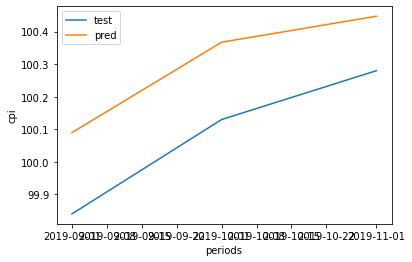

h	rmse	nrmse
1	0.2498	0.2502
3	0.2213	0.2211
6	0.2213	0.2211
12	0.2213	0.2211
reg_name:  BEL
CPU times: user 115 µs, sys: 82 µs, total: 197 µs
Wall time: 206 µs


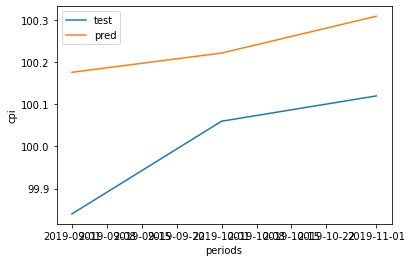

h	rmse	nrmse
1	0.3361	0.3366
3	0.2415	0.2414
6	0.2415	0.2414
12	0.2415	0.2414
reg_name:  BRY
CPU times: user 123 µs, sys: 0 ns, total: 123 µs
Wall time: 127 µs


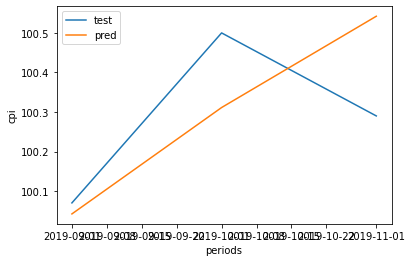

h	rmse	nrmse
1	0.0279	0.0278
3	0.1826	0.1820
6	0.1826	0.1820
12	0.1826	0.1820
reg_name:  VLA
CPU times: user 85 µs, sys: 59 µs, total: 144 µs
Wall time: 165 µs


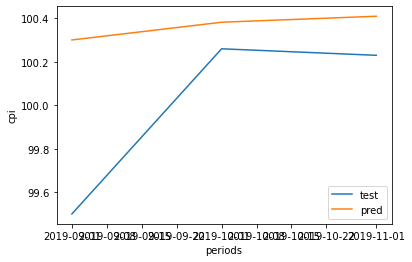

h	rmse	nrmse
1	0.8007	0.8047
3	0.4790	0.4790
6	0.4790	0.4790
12	0.4790	0.4790
reg_name:  VOR
CPU times: user 64 µs, sys: 44 µs, total: 108 µs
Wall time: 111 µs


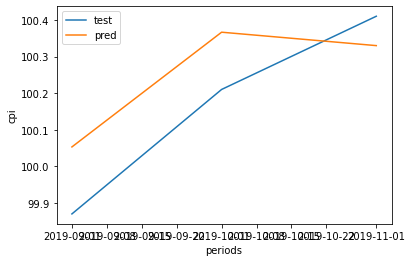

h	rmse	nrmse
1	0.1830	0.1832
3	0.1465	0.1463
6	0.1465	0.1463
12	0.1465	0.1463
reg_name:  IVA
CPU times: user 102 µs, sys: 73 µs, total: 175 µs
Wall time: 195 µs


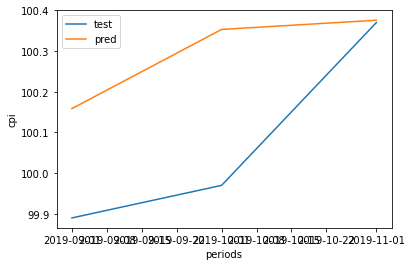

h	rmse	nrmse
1	0.2687	0.2690
3	0.2703	0.2701
6	0.2703	0.2701
12	0.2703	0.2701
reg_name:  KAL
CPU times: user 290 µs, sys: 206 µs, total: 496 µs
Wall time: 327 µs


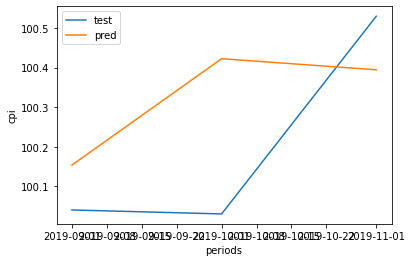

h	rmse	nrmse
1	0.1135	0.1134
3	0.2486	0.2481
6	0.2486	0.2481
12	0.2486	0.2481
reg_name:  KOS
CPU times: user 149 µs, sys: 0 ns, total: 149 µs
Wall time: 153 µs


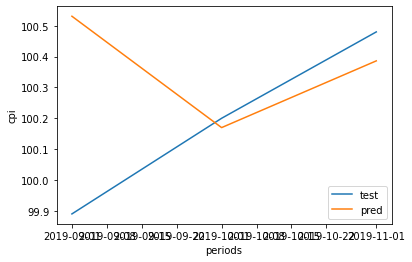

h	rmse	nrmse
1	0.6408	0.6415
3	0.3743	0.3736
6	0.3743	0.3736
12	0.3743	0.3736
reg_name:  KUR
CPU times: user 101 µs, sys: 71 µs, total: 172 µs
Wall time: 202 µs


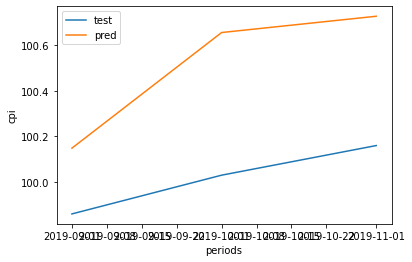

h	rmse	nrmse
1	0.2885	0.2889
3	0.5155	0.5154
6	0.5155	0.5154
12	0.5155	0.5154
reg_name:  LIP
CPU times: user 64 µs, sys: 46 µs, total: 110 µs
Wall time: 115 µs


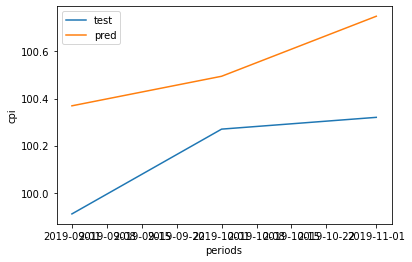

h	rmse	nrmse
1	0.4589	0.4594
3	0.3853	0.3846
6	0.3853	0.3846
12	0.3853	0.3846
reg_name:  MOS
CPU times: user 71 µs, sys: 51 µs, total: 122 µs
Wall time: 128 µs


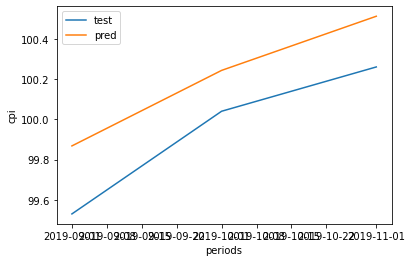

h	rmse	nrmse
1	0.3378	0.3394
3	0.2700	0.2702
6	0.2700	0.2702
12	0.2700	0.2702
reg_name:  ORL
CPU times: user 64 µs, sys: 45 µs, total: 109 µs
Wall time: 114 µs


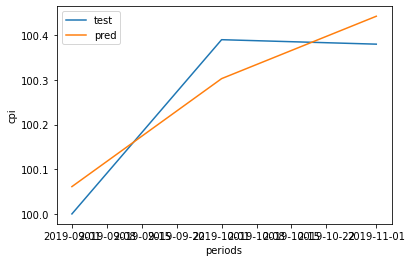

h	rmse	nrmse
1	0.0611	0.0611
3	0.0713	0.0711
6	0.0713	0.0711
12	0.0713	0.0711
reg_name:  RYA
CPU times: user 74 µs, sys: 52 µs, total: 126 µs
Wall time: 130 µs


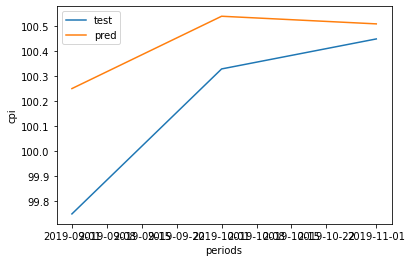

h	rmse	nrmse
1	0.5014	0.5027
3	0.3159	0.3154
6	0.3159	0.3154
12	0.3159	0.3154
reg_name:  SMO
CPU times: user 80 µs, sys: 58 µs, total: 138 µs
Wall time: 143 µs


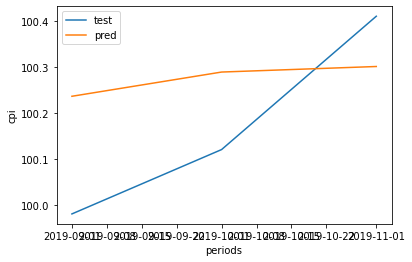

h	rmse	nrmse
1	0.2559	0.2560
3	0.1879	0.1875
6	0.1879	0.1875
12	0.1879	0.1875
reg_name:  TAM
CPU times: user 148 µs, sys: 106 µs, total: 254 µs
Wall time: 164 µs


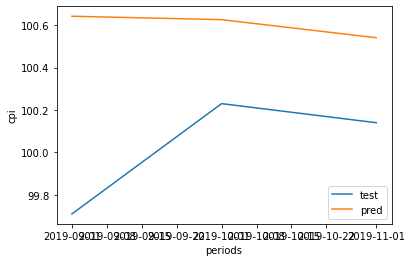

h	rmse	nrmse
1	0.9320	0.9347
3	0.6287	0.6286
6	0.6287	0.6286
12	0.6287	0.6286
reg_name:  TVE
CPU times: user 112 µs, sys: 0 ns, total: 112 µs
Wall time: 116 µs


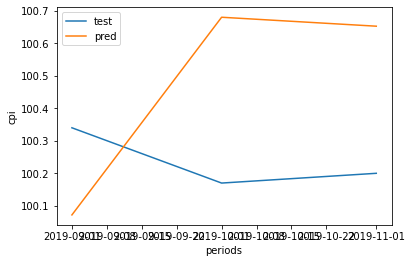

h	rmse	nrmse
1	0.2680	0.2671
3	0.4229	0.4219
6	0.4229	0.4219
12	0.4229	0.4219
reg_name:  TUL
CPU times: user 86 µs, sys: 62 µs, total: 148 µs
Wall time: 157 µs


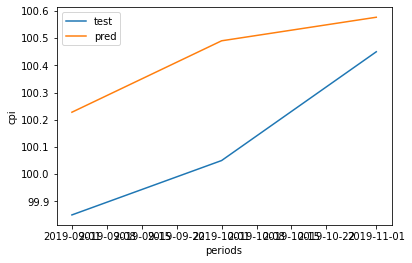

h	rmse	nrmse
1	0.3777	0.3783
3	0.3429	0.3425
6	0.3429	0.3425
12	0.3429	0.3425
reg_name:  YAR
CPU times: user 152 µs, sys: 0 ns, total: 152 µs
Wall time: 159 µs


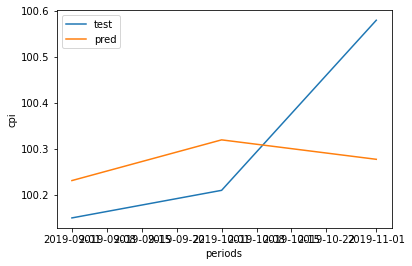

h	rmse	nrmse
1	0.0812	0.0811
3	0.1916	0.1910
6	0.1916	0.1910
12	0.1916	0.1910
reg_name:  MOW
CPU times: user 88 µs, sys: 63 µs, total: 151 µs
Wall time: 160 µs


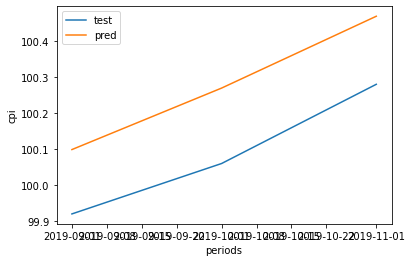

h	rmse	nrmse
1	0.1787	0.1789
3	0.1928	0.1927
6	0.1928	0.1927
12	0.1928	0.1927
reg_name:  KAR
CPU times: user 74 µs, sys: 52 µs, total: 126 µs
Wall time: 130 µs


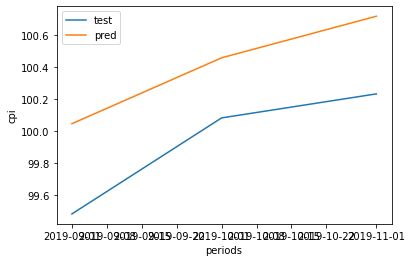

h	rmse	nrmse
1	0.5637	0.5667
3	0.4811	0.4814
6	0.4811	0.4814
12	0.4811	0.4814
reg_name:  KOM
CPU times: user 565 µs, sys: 401 µs, total: 966 µs
Wall time: 766 µs


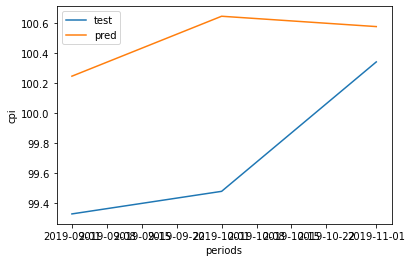

h	rmse	nrmse
1	0.9152	0.9214
3	0.8653	0.8678
6	0.8653	0.8678
12	0.8653	0.8678
reg_name:  ARK
CPU times: user 64 µs, sys: 45 µs, total: 109 µs
Wall time: 112 µs


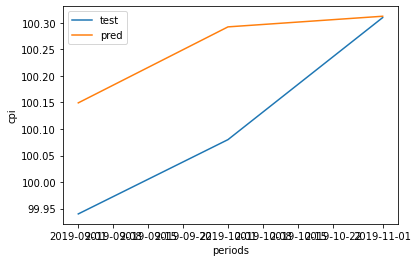

h	rmse	nrmse
1	0.2093	0.2094
3	0.1722	0.1720
6	0.1722	0.1720
12	0.1722	0.1720
reg_name:  VLG
CPU times: user 142 µs, sys: 100 µs, total: 242 µs
Wall time: 166 µs


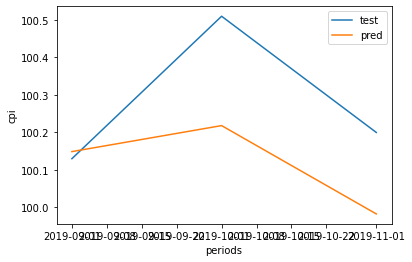

h	rmse	nrmse
1	0.0189	0.0189
3	0.2103	0.2098
6	0.2103	0.2098
12	0.2103	0.2098
reg_name:  KAG
CPU times: user 81 µs, sys: 58 µs, total: 139 µs
Wall time: 144 µs


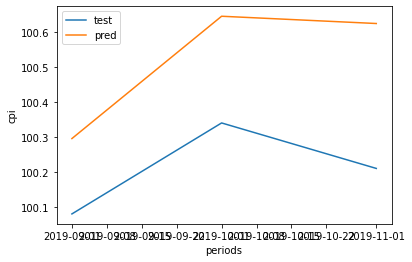

h	rmse	nrmse
1	0.2154	0.2152
3	0.3219	0.3213
6	0.3219	0.3213
12	0.3219	0.3213
reg_name:  LEN
CPU times: user 221 µs, sys: 155 µs, total: 376 µs
Wall time: 267 µs


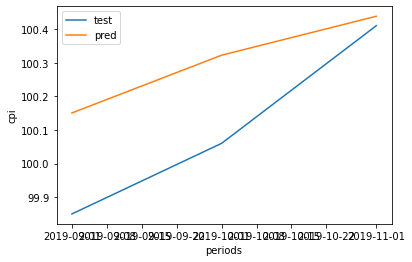

h	rmse	nrmse
1	0.3004	0.3009
3	0.2308	0.2306
6	0.2308	0.2306
12	0.2308	0.2306
reg_name:  MUR
CPU times: user 80 µs, sys: 57 µs, total: 137 µs
Wall time: 143 µs


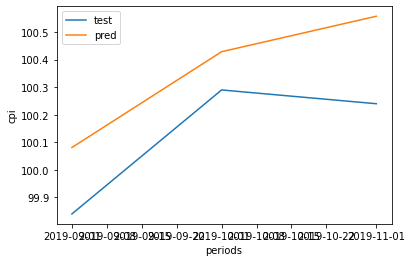

h	rmse	nrmse
1	0.2410	0.2414
3	0.2437	0.2434
6	0.2437	0.2434
12	0.2437	0.2434
reg_name:  NGR
CPU times: user 580 µs, sys: 0 ns, total: 580 µs
Wall time: 385 µs


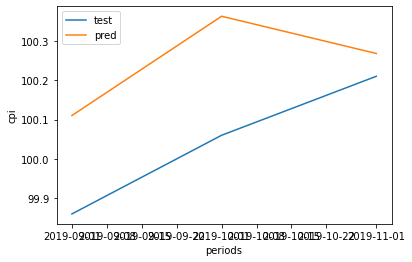

h	rmse	nrmse
1	0.2502	0.2505
3	0.2292	0.2291
6	0.2292	0.2291
12	0.2292	0.2291
reg_name:  PSK
CPU times: user 80 µs, sys: 57 µs, total: 137 µs
Wall time: 141 µs


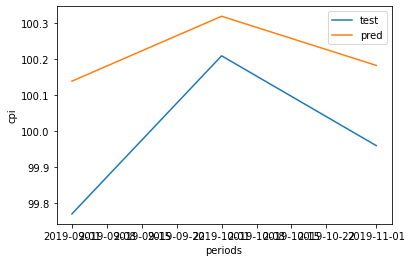

h	rmse	nrmse
1	0.3694	0.3703
3	0.2572	0.2572
6	0.2572	0.2572
12	0.2572	0.2572
reg_name:  SPB
CPU times: user 267 µs, sys: 0 ns, total: 267 µs
Wall time: 178 µs


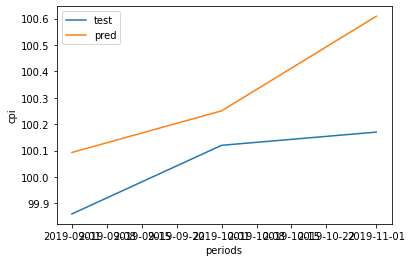

h	rmse	nrmse
1	0.2329	0.2332
3	0.2967	0.2965
6	0.2967	0.2965
12	0.2967	0.2965
reg_name:  ADY
CPU times: user 67 µs, sys: 48 µs, total: 115 µs
Wall time: 118 µs


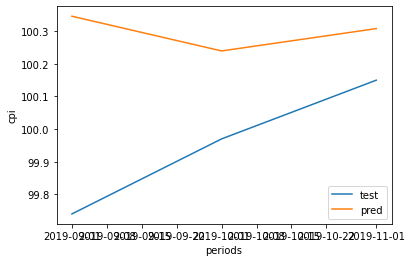

h	rmse	nrmse
1	0.6060	0.6076
3	0.3937	0.3939
6	0.3937	0.3939
12	0.3937	0.3939
reg_name:  KLM
CPU times: user 163 µs, sys: 0 ns, total: 163 µs
Wall time: 169 µs


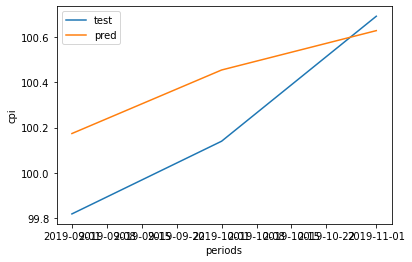

h	rmse	nrmse
1	0.3538	0.3545
3	0.2753	0.2748
6	0.2753	0.2748
12	0.2753	0.2748
reg_name:  KRA
CPU times: user 371 µs, sys: 262 µs, total: 633 µs
Wall time: 458 µs


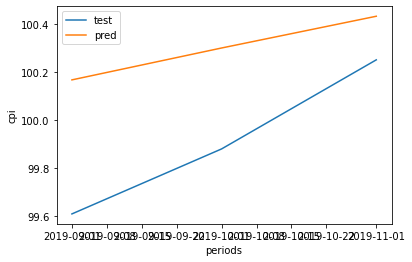

h	rmse	nrmse
1	0.5568	0.5590
3	0.4158	0.4161
6	0.4158	0.4161
12	0.4158	0.4161
reg_name:  AST
CPU times: user 95 µs, sys: 67 µs, total: 162 µs
Wall time: 166 µs


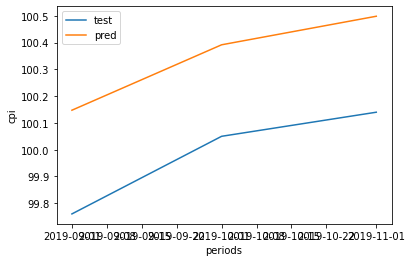

h	rmse	nrmse
1	0.3875	0.3884
3	0.3632	0.3632
6	0.3632	0.3632
12	0.3632	0.3632
reg_name:  VGG
CPU times: user 396 µs, sys: 0 ns, total: 396 µs
Wall time: 284 µs


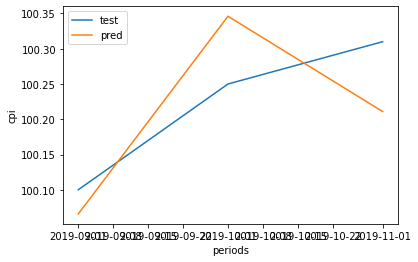

h	rmse	nrmse
1	0.0342	0.0342
3	0.0821	0.0819
6	0.0821	0.0819
12	0.0821	0.0819
reg_name:  ROS
CPU times: user 76 µs, sys: 54 µs, total: 130 µs
Wall time: 135 µs


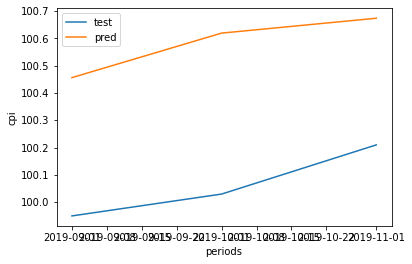

h	rmse	nrmse
1	0.5062	0.5065
3	0.5223	0.5219
6	0.5223	0.5219
12	0.5223	0.5219
reg_name:  DAG
CPU times: user 64 µs, sys: 46 µs, total: 110 µs
Wall time: 113 µs


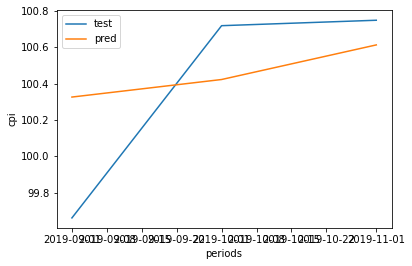

h	rmse	nrmse
1	0.6664	0.6687
3	0.4285	0.4268
6	0.4285	0.4268
12	0.4285	0.4268
reg_name:  ING
CPU times: user 74 µs, sys: 53 µs, total: 127 µs
Wall time: 131 µs


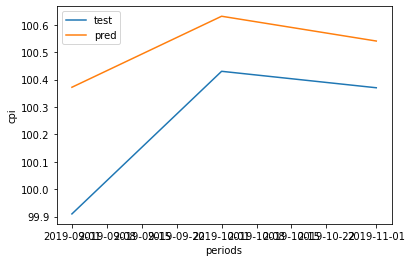

h	rmse	nrmse
1	0.4618	0.4623
3	0.3069	0.3062
6	0.3069	0.3062
12	0.3069	0.3062
reg_name:  KAB
CPU times: user 305 µs, sys: 215 µs, total: 520 µs
Wall time: 385 µs


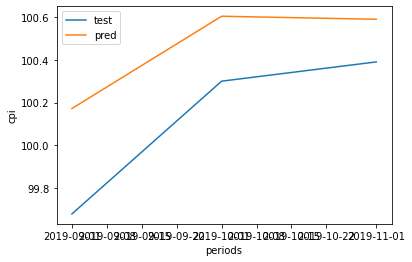

h	rmse	nrmse
1	0.4922	0.4938
3	0.3530	0.3526
6	0.3530	0.3526
12	0.3530	0.3526
reg_name:  KAO
CPU times: user 82 µs, sys: 59 µs, total: 141 µs
Wall time: 146 µs


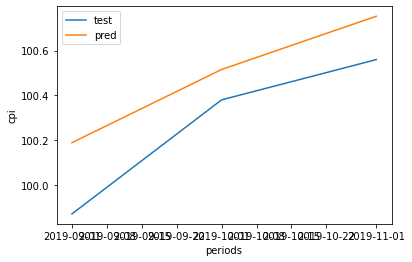

h	rmse	nrmse
1	0.3185	0.3189
3	0.2291	0.2285
6	0.2291	0.2285
12	0.2291	0.2285
reg_name:  NOR
CPU times: user 64 µs, sys: 46 µs, total: 110 µs
Wall time: 113 µs


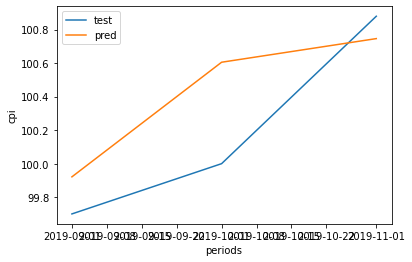

h	rmse	nrmse
1	0.2213	0.2220
3	0.3801	0.3794
6	0.3801	0.3794
12	0.3801	0.3794
reg_name:  STA
CPU times: user 689 µs, sys: 488 µs, total: 1.18 ms
Wall time: 886 µs


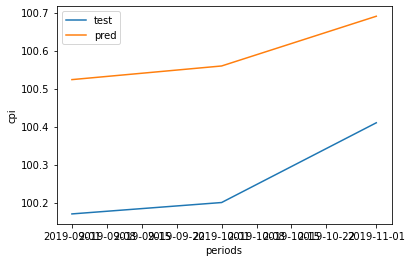

h	rmse	nrmse
1	0.3537	0.3531
3	0.3332	0.3324
6	0.3332	0.3324
12	0.3332	0.3324
reg_name:  BAS
CPU times: user 65 µs, sys: 46 µs, total: 111 µs
Wall time: 115 µs


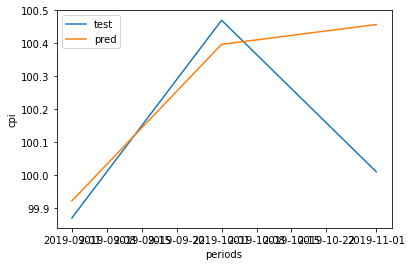

h	rmse	nrmse
1	0.0518	0.0519
3	0.2632	0.2629
6	0.2632	0.2629
12	0.2632	0.2629
reg_name:  MAR
CPU times: user 329 µs, sys: 234 µs, total: 563 µs
Wall time: 415 µs


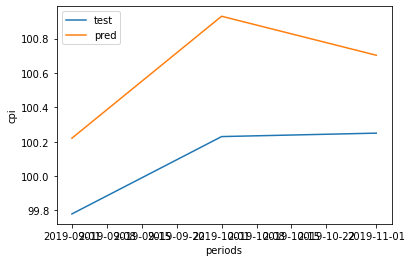

h	rmse	nrmse
1	0.4407	0.4417
3	0.5446	0.5442
6	0.5446	0.5442
12	0.5446	0.5442
reg_name:  MOR
CPU times: user 73 µs, sys: 53 µs, total: 126 µs
Wall time: 132 µs


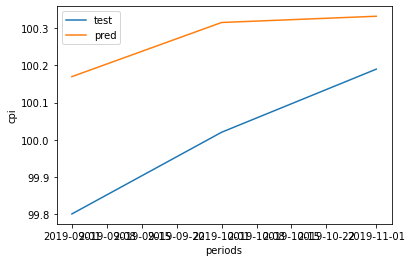

h	rmse	nrmse
1	0.3698	0.3706
3	0.2855	0.2855
6	0.2855	0.2855
12	0.2855	0.2855
reg_name:  TAT
CPU times: user 86 µs, sys: 61 µs, total: 147 µs
Wall time: 170 µs


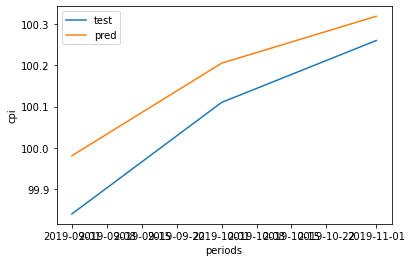

h	rmse	nrmse
1	0.1409	0.1412
3	0.1039	0.1038
6	0.1039	0.1038
12	0.1039	0.1038
reg_name:  UDM
CPU times: user 589 µs, sys: 419 µs, total: 1.01 ms
Wall time: 767 µs


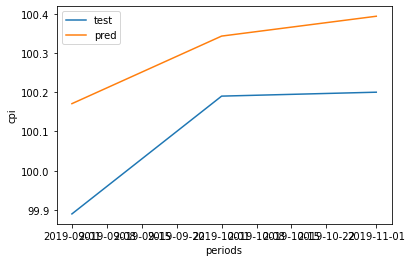

h	rmse	nrmse
1	0.2808	0.2811
3	0.2158	0.2156
6	0.2158	0.2156
12	0.2158	0.2156
reg_name:  CHV
CPU times: user 60 µs, sys: 43 µs, total: 103 µs
Wall time: 106 µs


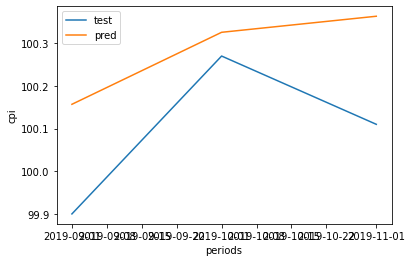

h	rmse	nrmse
1	0.2569	0.2572
3	0.2108	0.2106
6	0.2108	0.2106
12	0.2108	0.2106
reg_name:  PER
CPU times: user 63 µs, sys: 45 µs, total: 108 µs
Wall time: 112 µs


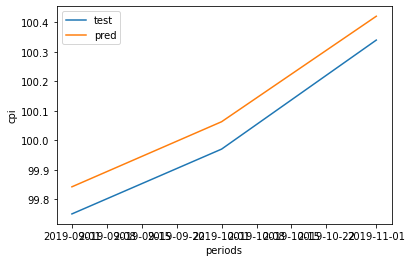

h	rmse	nrmse
1	0.0920	0.0922
3	0.0888	0.0888
6	0.0888	0.0888
12	0.0888	0.0888
reg_name:  KIR
CPU times: user 63 µs, sys: 45 µs, total: 108 µs
Wall time: 129 µs


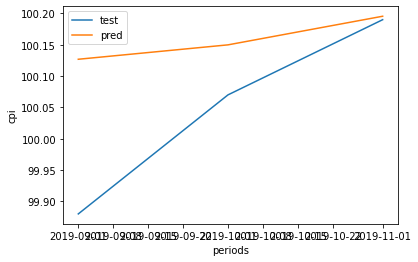

h	rmse	nrmse
1	0.2469	0.2472
3	0.1498	0.1498
6	0.1498	0.1498
12	0.1498	0.1498
reg_name:  NIZ
CPU times: user 83 µs, sys: 59 µs, total: 142 µs
Wall time: 162 µs


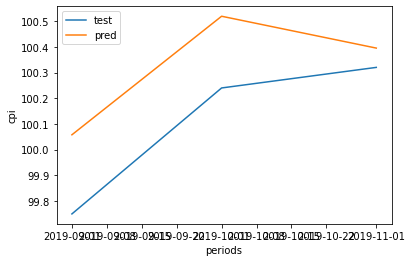

h	rmse	nrmse
1	0.3078	0.3086
3	0.2437	0.2435
6	0.2437	0.2435
12	0.2437	0.2435
reg_name:  ORE
CPU times: user 78 µs, sys: 54 µs, total: 132 µs
Wall time: 136 µs


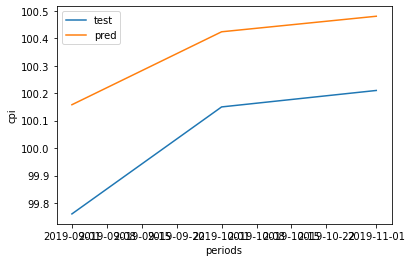

h	rmse	nrmse
1	0.3980	0.3990
3	0.3197	0.3196
6	0.3197	0.3196
12	0.3197	0.3196
reg_name:  PNZ
CPU times: user 63 µs, sys: 45 µs, total: 108 µs
Wall time: 112 µs


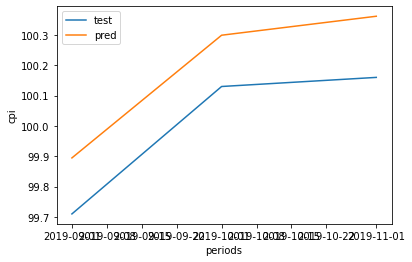

h	rmse	nrmse
1	0.1846	0.1852
3	0.1855	0.1855
6	0.1855	0.1855
12	0.1855	0.1855
reg_name:  SAM
CPU times: user 57 µs, sys: 40 µs, total: 97 µs
Wall time: 101 µs


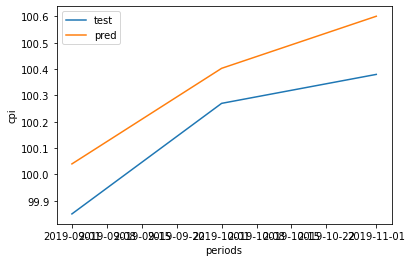

h	rmse	nrmse
1	0.1900	0.1903
3	0.1849	0.1846
6	0.1849	0.1846
12	0.1849	0.1846
reg_name:  SAR
CPU times: user 62 µs, sys: 45 µs, total: 107 µs
Wall time: 110 µs


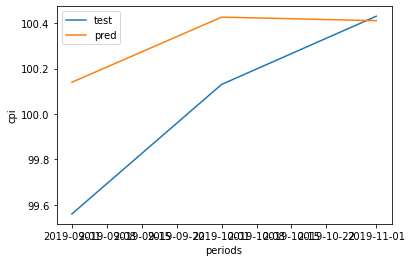

h	rmse	nrmse
1	0.5795	0.5821
3	0.3759	0.3758
6	0.3759	0.3758
12	0.3759	0.3758
reg_name:  ULY
CPU times: user 62 µs, sys: 44 µs, total: 106 µs
Wall time: 109 µs


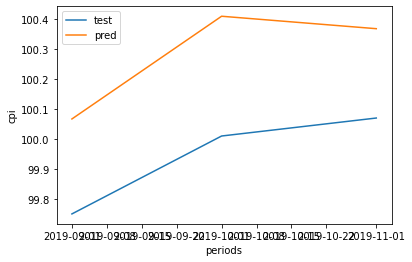

h	rmse	nrmse
1	0.3169	0.3177
3	0.3411	0.3413
6	0.3411	0.3413
12	0.3411	0.3413
reg_name:  KUG
CPU times: user 62 µs, sys: 45 µs, total: 107 µs
Wall time: 110 µs


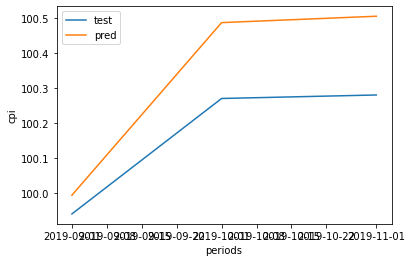

h	rmse	nrmse
1	0.0535	0.0536
3	0.1831	0.1828
6	0.1831	0.1828
12	0.1831	0.1828
reg_name:  SVE
CPU times: user 510 µs, sys: 360 µs, total: 870 µs
Wall time: 642 µs


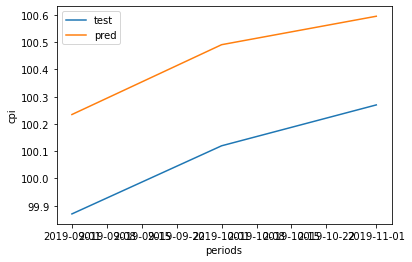

h	rmse	nrmse
1	0.3647	0.3652
3	0.3543	0.3540
6	0.3543	0.3540
12	0.3543	0.3540
reg_name:  TYU
CPU times: user 123 µs, sys: 0 ns, total: 123 µs
Wall time: 128 µs


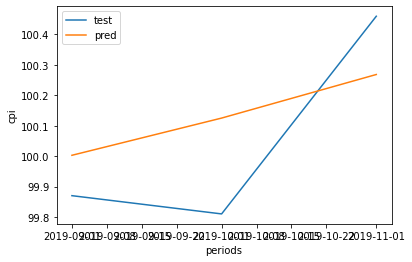

h	rmse	nrmse
1	0.1328	0.1329
3	0.2263	0.2262
6	0.2263	0.2262
12	0.2263	0.2262
reg_name:  CHE
CPU times: user 130 µs, sys: 91 µs, total: 221 µs
Wall time: 188 µs


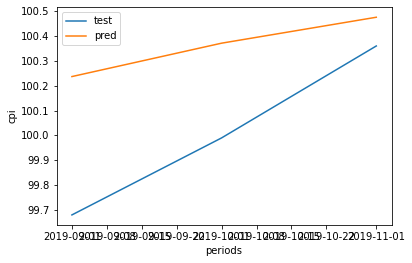

h	rmse	nrmse
1	0.5569	0.5587
3	0.3953	0.3953
6	0.3953	0.3953
12	0.3953	0.3953
reg_name:  ALI
CPU times: user 315 µs, sys: 222 µs, total: 537 µs
Wall time: 389 µs


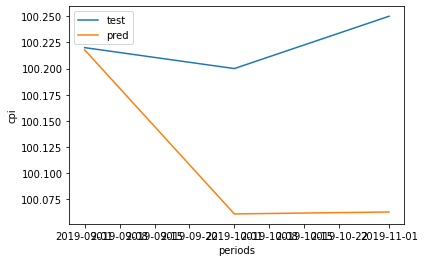

h	rmse	nrmse
1	0.0021	0.0021
3	0.1345	0.1342
6	0.1345	0.1342
12	0.1345	0.1342
reg_name:  TUV
CPU times: user 84 µs, sys: 60 µs, total: 144 µs
Wall time: 162 µs


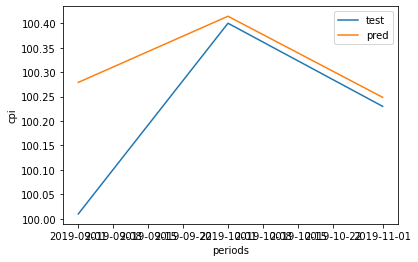

h	rmse	nrmse
1	0.2690	0.2690
3	0.1559	0.1556
6	0.1559	0.1556
12	0.1559	0.1556
reg_name:  KHK
CPU times: user 128 µs, sys: 92 µs, total: 220 µs
Wall time: 139 µs


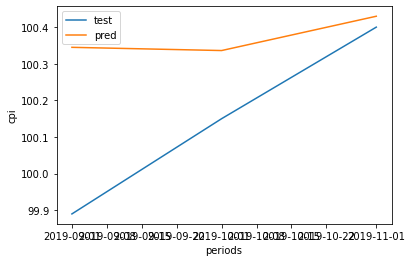

h	rmse	nrmse
1	0.4549	0.4554
3	0.2843	0.2839
6	0.2843	0.2839
12	0.2843	0.2839
reg_name:  ALT
CPU times: user 61 µs, sys: 44 µs, total: 105 µs
Wall time: 108 µs


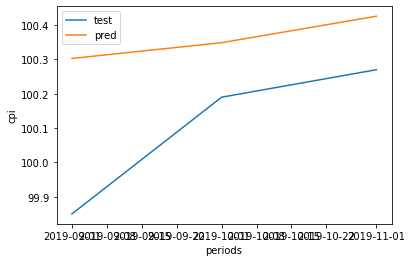

h	rmse	nrmse
1	0.4529	0.4536
3	0.2914	0.2911
6	0.2914	0.2911
12	0.2914	0.2911
reg_name:  KYA
CPU times: user 102 µs, sys: 73 µs, total: 175 µs
Wall time: 151 µs


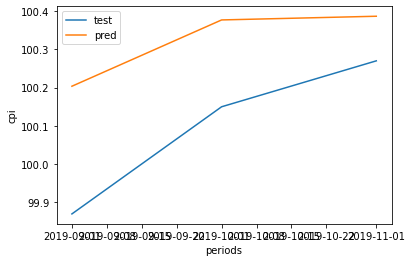

h	rmse	nrmse
1	0.3337	0.3341
3	0.2425	0.2423
6	0.2425	0.2423
12	0.2425	0.2423
reg_name:  IRK
CPU times: user 116 µs, sys: 81 µs, total: 197 µs
Wall time: 162 µs


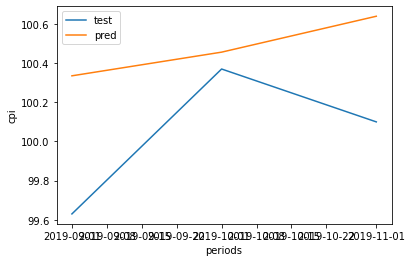

h	rmse	nrmse
1	0.7052	0.7078
3	0.5150	0.5149
6	0.5150	0.5149
12	0.5150	0.5149
reg_name:  KEM
CPU times: user 64 µs, sys: 45 µs, total: 109 µs
Wall time: 112 µs


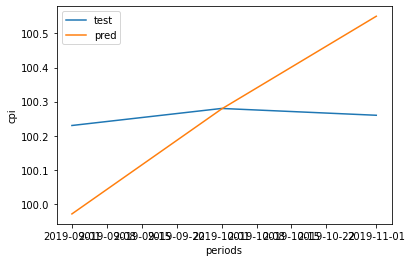

h	rmse	nrmse
1	0.2595	0.2589
3	0.2250	0.2244
6	0.2250	0.2244
12	0.2250	0.2244
reg_name:  NVS
CPU times: user 77 µs, sys: 54 µs, total: 131 µs
Wall time: 138 µs


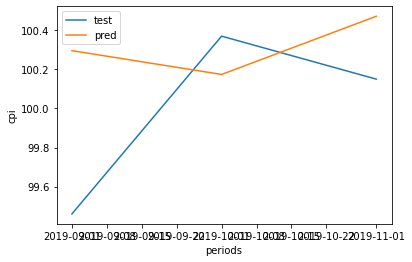

h	rmse	nrmse
1	0.8359	0.8404
3	0.5294	0.5294
6	0.5294	0.5294
12	0.5294	0.5294
reg_name:  OMS
CPU times: user 61 µs, sys: 43 µs, total: 104 µs
Wall time: 108 µs


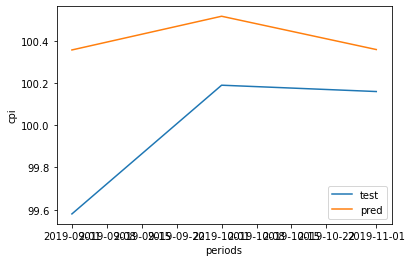

h	rmse	nrmse
1	0.7771	0.7803
3	0.5001	0.5002
6	0.5001	0.5002
12	0.5001	0.5002
reg_name:  TOM
CPU times: user 77 µs, sys: 55 µs, total: 132 µs
Wall time: 138 µs


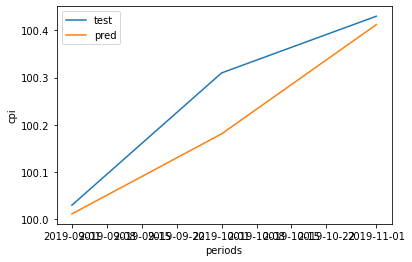

h	rmse	nrmse
1	0.0186	0.0186
3	0.0759	0.0757
6	0.0759	0.0757
12	0.0759	0.0757
reg_name:  BUR
CPU times: user 751 µs, sys: 532 µs, total: 1.28 ms
Wall time: 901 µs


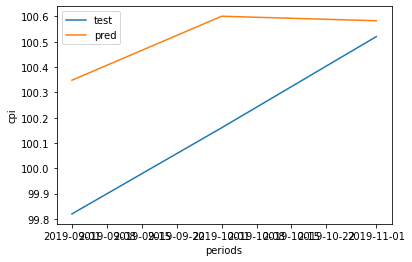

h	rmse	nrmse
1	0.5279	0.5288
3	0.3985	0.3979
6	0.3985	0.3979
12	0.3985	0.3979
reg_name:  SAH
CPU times: user 62 µs, sys: 45 µs, total: 107 µs
Wall time: 110 µs


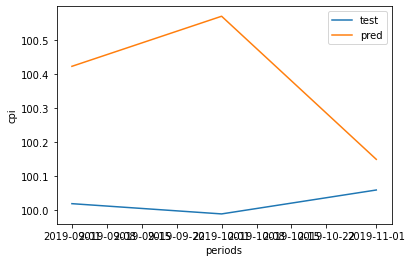

h	rmse	nrmse
1	0.4020	0.4019
3	0.4100	0.4099
6	0.4100	0.4099
12	0.4100	0.4099
reg_name:  ZAB
CPU times: user 60 µs, sys: 42 µs, total: 102 µs
Wall time: 105 µs


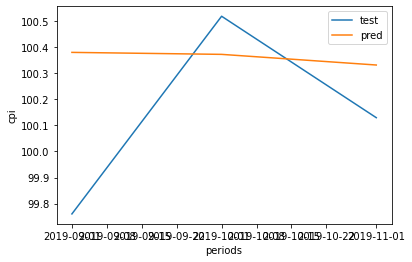

h	rmse	nrmse
1	0.6211	0.6226
3	0.3865	0.3860
6	0.3865	0.3860
12	0.3865	0.3860
reg_name:  KAM
CPU times: user 150 µs, sys: 106 µs, total: 256 µs
Wall time: 164 µs


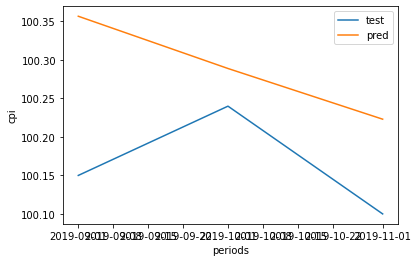

h	rmse	nrmse
1	0.2068	0.2065
3	0.1418	0.1416
6	0.1418	0.1416
12	0.1418	0.1416
reg_name:  PRI
CPU times: user 118 µs, sys: 85 µs, total: 203 µs
Wall time: 163 µs


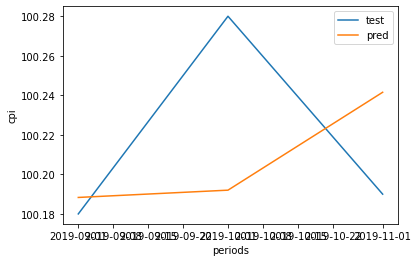

h	rmse	nrmse
1	0.0083	0.0083
3	0.0591	0.0589
6	0.0591	0.0589
12	0.0591	0.0589
reg_name:  KHA
CPU times: user 92 µs, sys: 65 µs, total: 157 µs
Wall time: 176 µs


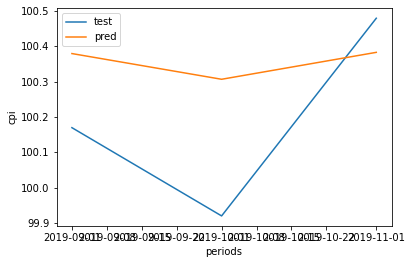

h	rmse	nrmse
1	0.2099	0.2096
3	0.2603	0.2598
6	0.2603	0.2598
12	0.2603	0.2598
reg_name:  AMU
CPU times: user 126 µs, sys: 0 ns, total: 126 µs
Wall time: 133 µs


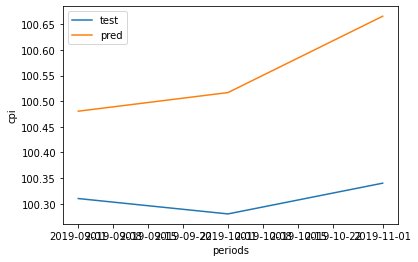

h	rmse	nrmse
1	0.1705	0.1700
3	0.2525	0.2518
6	0.2525	0.2518
12	0.2525	0.2518
reg_name:  MAG
CPU times: user 71 µs, sys: 49 µs, total: 120 µs
Wall time: 125 µs


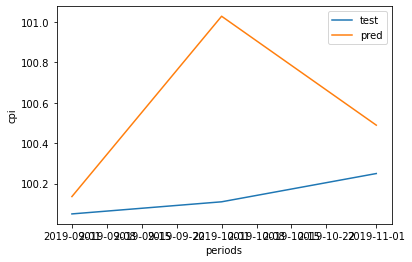

h	rmse	nrmse
1	0.0859	0.0859
3	0.5506	0.5498
6	0.5506	0.5498
12	0.5506	0.5498
reg_name:  SAK
CPU times: user 573 µs, sys: 405 µs, total: 978 µs
Wall time: 747 µs


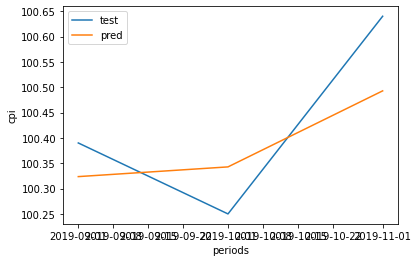

h	rmse	nrmse
1	0.0664	0.0661
3	0.1075	0.1071
6	0.1075	0.1071
12	0.1075	0.1071
reg_name:  JEW
CPU times: user 60 µs, sys: 44 µs, total: 104 µs
Wall time: 106 µs


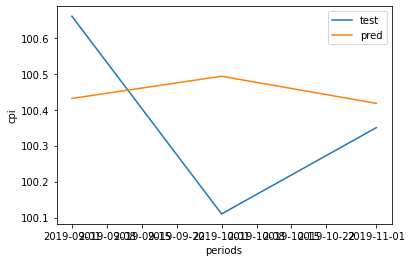

h	rmse	nrmse
1	0.2287	0.2272
3	0.2605	0.2596
6	0.2605	0.2596
12	0.2605	0.2596
reg_name:  CHU
CPU times: user 70 µs, sys: 51 µs, total: 121 µs
Wall time: 125 µs


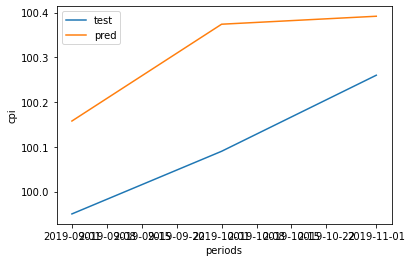

h	rmse	nrmse
1	0.2076	0.2077
3	0.2169	0.2167
6	0.2169	0.2167
12	0.2169	0.2167


In [ ]:
rmse_list = []
nrmse_list = []

# reg_name = 'SBFO'
for reg_name in reg_names:
  print('=======================================================================')
  print('reg_name: ', reg_name)

  # make lag factors for reg_name
  df = pd.DataFrame()
  df['t'] = data[reg_name].values
  for i in range(1, 13):
      df['t-'+str(i)] = data[reg_name].shift(i).values
      
  df.index = data.index
  df = df.tail(-12)

  # add month number
  df['month'] = pd.DatetimeIndex(df.index).month

  train = df[:-test_len]
  test = df[-test_len:].t

  X_train = train[['month'] + ['t-{}'.format(month) for month in range(1,13)]].values
  y_train = train[['t']].values.ravel()

  #train model
  %time model = XGBRegressor(n_estimators=100, \
                            random_state=42, \
                            objective ='reg:squarederror')
  model.fit(X_train, y_train)

  # sliding window forecast
  slide_test = df[-test_len:-test_len+1][['month'] + ['t-{}'.format(month) for month in range(1,13)]].values

  predict = []
  predict.append(model.predict(slide_test)[0])

  for _ in range(1,test_len):
    
    slide_test_next = slide_test.copy()
    slide_test_next[0, 1] = predict[-1]

    slide_test_next[0, 0] = (slide_test_next[0, 0])%12 + 1 
    slide_test_next[0, 2:] = slide_test[0, 1:-1]
    
    # print(slide_test_next)
    slide_test = slide_test_next.copy()

    predict.append(model.predict(slide_test)[0])

  predict = pd.DataFrame(np.array(predict), index = test.index, columns=[reg_name])
  plot_series(test, predict[reg_name])

  # print results
  rmse_reg, nrmse_reg = get_metric(test.values, predict[reg_name].values, horizon=[1,3,6,12])

  rmse_list.append(rmse_reg)
  nrmse_list.append(nrmse_reg)

## region average

In [ ]:
print('metric\horizon\th=1\th=3\th=6\th=12')
mean_rmse_list = np.mean(rmse_list, axis=0)
print('rmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_rmse_list[0], mean_rmse_list[1], mean_rmse_list[2], mean_rmse_list[3]))
mean_nrmse_list = np.mean(nrmse_list, axis=0)
print('nrmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_nrmse_list[0], mean_nrmse_list[1], mean_nrmse_list[2], mean_nrmse_list[3]))

metric\horizon	h=1	h=3	h=6	h=12
rmse		0.3306	0.2969	0.2969	0.2969
nrmse		0.3313	0.2966	0.2966	0.2966


# Extreme Gradient Boosting with features (not realised yet)
  separate reg models

In [ ]:
from xgboost import XGBRegressor

## Training once, forecast for test_len period

In [ ]:
"""
from google.colab import files
files.upload()
"""

In [ ]:
def add_means(data, horizon=[2,3,4,5,6,12]):
  for h in horizon:
    data['mean_{}'.format] = np.mean(data['t-{}'.format(i) for in range(h)].values)


In [ ]:
rmse_list = []
nrmse_list = []

# reg_name = 'SBFO'
for reg_name in reg_names:
  print('=======================================================================')
  print('reg_name: ', reg_name)

  # make lag factors for reg_name
  df = pd.DataFrame()
  df['t'] = data[reg_name].values
  for i in range(1, 13):
      df['t-'+str(i)] = data[reg_name].shift(i).values
      
  df.index = data.index
  df = df.tail(-12)

  # add month number
  df['month'] = pd.DatetimeIndex(df.index).month

  train = df[:-test_len]
  test = df[-test_len:].t

  X_train = train[['month'] + ['t-{}'.format(month) for month in range(1,13)]].values
  y_train = train[['t']].values.ravel()

  #train model
  %time model = XGBRegressor(n_estimators=100, \
                            random_state=42, \
                            objective ='reg:squarederror')
  model.fit(X_train, y_train)

  # sliding window forecast
  slide_test = df[-test_len:-test_len+1][['month'] + ['t-{}'.format(month) for month in range(1,13)]].values

  predict = []
  predict.append(model.predict(slide_test)[0])

  for _ in range(1,test_len):
    
    slide_test_next = slide_test.copy()
    slide_test_next[0, 1] = predict[-1]

    slide_test_next[0, 0] = (slide_test_next[0, 0])%12 + 1 
    slide_test_next[0, 2:] = slide_test[0, 1:-1]
    
    # print(slide_test_next)
    slide_test = slide_test_next.copy()

    predict.append(model.predict(slide_test)[0])

  predict = pd.DataFrame(np.array(predict), index = test.index, columns=[reg_name])
  plot_series(test, predict[reg_name])

  # print results
  rmse_reg, nrmse_reg = get_metric(test.values, predict[reg_name].values, horizon=[1,3,6,12])

  rmse_list.append(rmse_reg)
  nrmse_list.append(nrmse_reg)

## region average

In [ ]:
print('metric\horizon\th=1\th=3\th=6\th=12')
mean_rmse_list = np.mean(rmse_list, axis=0)
print('rmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_rmse_list[0], mean_rmse_list[1], mean_rmse_list[2], mean_rmse_list[3]))
mean_nrmse_list = np.mean(nrmse_list, axis=0)
print('nrmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_nrmse_list[0], mean_nrmse_list[1], mean_nrmse_list[2], mean_nrmse_list[3]))